In [1]:
# ---------------------------------------------------------------------
# Imports
# ---------------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys, os

sys.path.append(os.path.abspath(".."))

from energy.strategies.rolling import rolling_pnl, roll_EL, RollingStrategy
from energy.strategies.momentum import momentum
from energy.strategies.carry import carry
from energy.analytics.metrics import metrics
from energy.preprocess.expiry_calendar import expiry_calendar  # or others
from energy.preprocess.read_data import read_data  # if you built a loader
from energy.preprocess.drop_dupes import drop_dupes


plt.style.use("seaborn-v0_8-whitegrid")

data_path = "../data/Commods.xlsx"
calendar_path = "../data/expiry_calendars.xlsx"


In [2]:
cutoff = pd.Timestamp("2022-01-04")

# Commodity parameters:
COMMODITIES = {
    "Propane": ("BAP", 100, 42000, 0.001),
    "Ethane":  ("CAP", 100, 42000, 0.001),
    "Butane":  ("DAE", 100, 42000, 0.001),
    "WTI":     ("CL", 100, 1000, 0.01),
    "Brent":   ("CO", 100, 1000, 0.01),
    "ULSD":    ("HO", 100, 42000, 0.05),
    "RBOB":    ("XB", 100, 42000, 0.05),
    "Gasoil":  ("QS", 100, 100, 0.5),
    "Natgas":  ("NG", 100, 10000, 0.001),
}

roll_window = 5

CLEAN_DATA = {}
all_ma_results = {}
all_carry_results = {}


=== Propane (BAP) | t_cost=0.001 ===
Found sheet 'Propane (BAP)' for BAP
[DEBUG] wrote propane_t5_debug_LIBRARY.xlsx


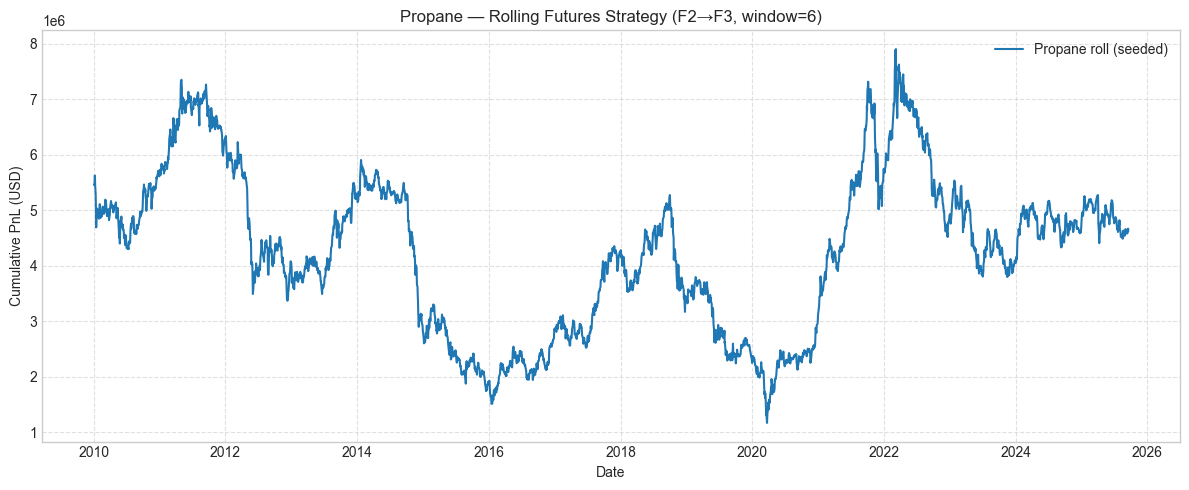

----- Propane — Rolling Futures Metrics (Full Sample, USD) -----


Total PnL      Total Cost  APL/unit  Std Dev (ann.)  Sharpe  Drawdown  \
0 -838,362.0000 -1,587,600.0000   -0.0127          0.2643 -0.0480   -0.0147   

      RoD   Years  
0 -0.8665 15.7205

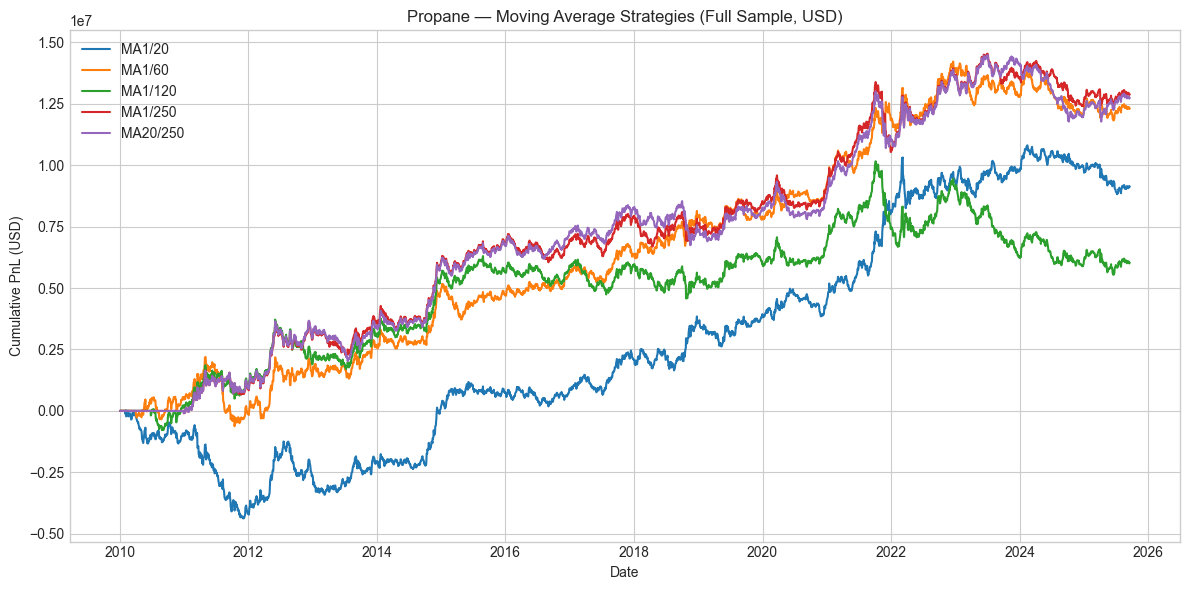

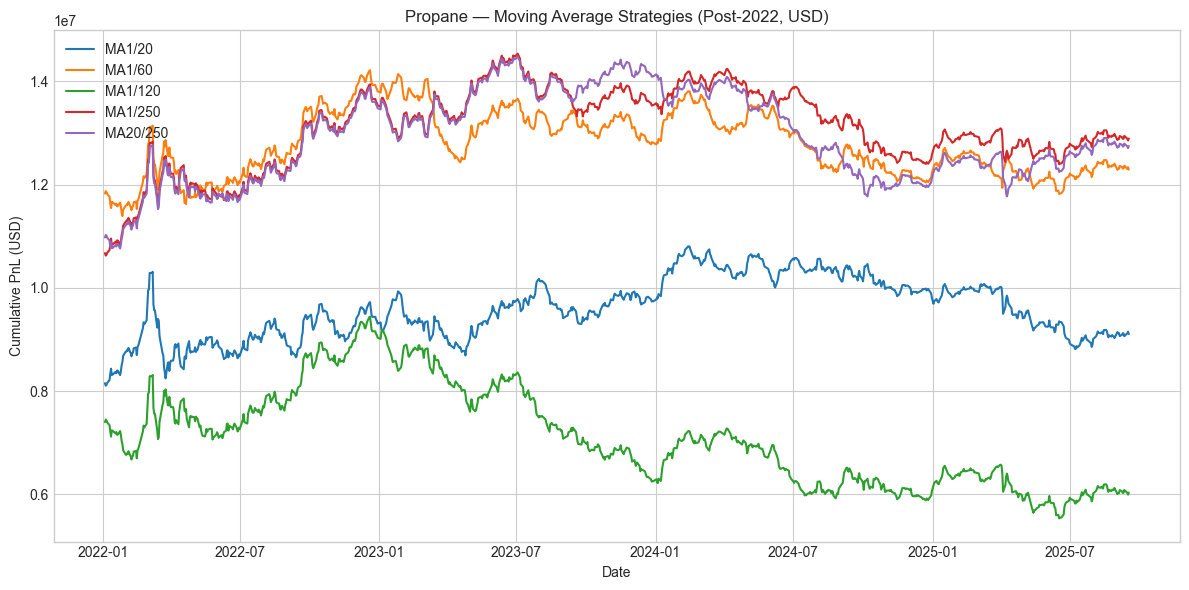

----- Propane — MA Strategy Metrics (Full / Pre / Post, USD) -----

MA1/20


Total PnL     Total Cost  APL/unit  Std Dev (ann.)  Sharpe  \
Full Sample 0 9,107,112.0000 3,679,200.0000    0.1379          0.2642  0.5221   
Pre-2022    0 8,080,632.0000 2,843,400.0000    0.1601          0.2586  0.6194   
Post-2022   0 1,026,480.0000   835,800.0000    0.0660          0.2817  0.2342   

               Drawdown     RoD   Years  
Full Sample 0   -0.0105 13.1701 15.7205  
Pre-2022    0   -0.0105 15.2913 12.0137  
Post-2022   0   -0.0049 13.4924  3.7041


MA1/60


Total PnL     Total Cost  APL/unit  Std Dev (ann.)  \
Full Sample 0 12,291,888.0000 2,536,800.0000    0.1862          0.2621   
Pre-2022    0 11,900,574.0000 1,860,600.0000    0.2359          0.2559   
Post-2022   0    391,314.0000   676,200.0000    0.0252          0.2812   

               Sharpe  Drawdown     RoD   Years  
Full Sample 0  0.7104   -0.0067 27.8668 15.7205  
Pre-2022    0  0.9218   -0.0067 35.3043 12.0137  
Post-2022   0  0.0895   -0.0057  4.4313  3.7041


MA1/120


Total PnL     Total Cost  APL/unit  Std Dev (ann.)  \
Full Sample 0  6,035,484.0000 2,146,200.0000    0.0914          0.2599   
Pre-2022    0  7,474,530.0000 1,554,000.0000    0.1481          0.2530   
Post-2022   0 -1,439,046.0000   592,200.0000   -0.0925          0.2810   

               Sharpe  Drawdown     RoD   Years  
Full Sample 0  0.3518   -0.0107  8.5104 15.7205  
Pre-2022    0  0.5856   -0.0064 23.1016 12.0137  
Post-2022   0 -0.3292   -0.0093 -9.9903  3.7041


MA1/250


Total PnL     Total Cost  APL/unit  Std Dev (ann.)  \
Full Sample 0 12,894,714.0000 1,932,000.0000    0.1953          0.2558   
Pre-2022    0 10,601,220.0000 1,381,800.0000    0.2101          0.2478   
Post-2022   0  2,293,494.0000   550,200.0000    0.1474          0.2806   

               Sharpe  Drawdown     RoD   Years  
Full Sample 0  0.7634   -0.0066 29.7121 15.7205  
Pre-2022    0  0.8480   -0.0066 31.9645 12.0137  
Post-2022   0  0.5253   -0.0051 29.1688  3.7041


MA20/250


Total PnL     Total Cost  APL/unit  Std Dev (ann.)  \
Full Sample 0 12,746,286.0000 1,663,200.0000    0.1930          0.2555   
Pre-2022    0 11,052,468.0000 1,230,600.0000    0.2190          0.2474   
Post-2022   0  1,693,818.0000   432,600.0000    0.1089          0.2801   

               Sharpe  Drawdown     RoD   Years  
Full Sample 0  0.7557   -0.0062 30.9348 15.7205  
Pre-2022    0  0.8853   -0.0053 41.2747 12.0137  
Post-2022   0  0.3887   -0.0064 17.0029  3.7041

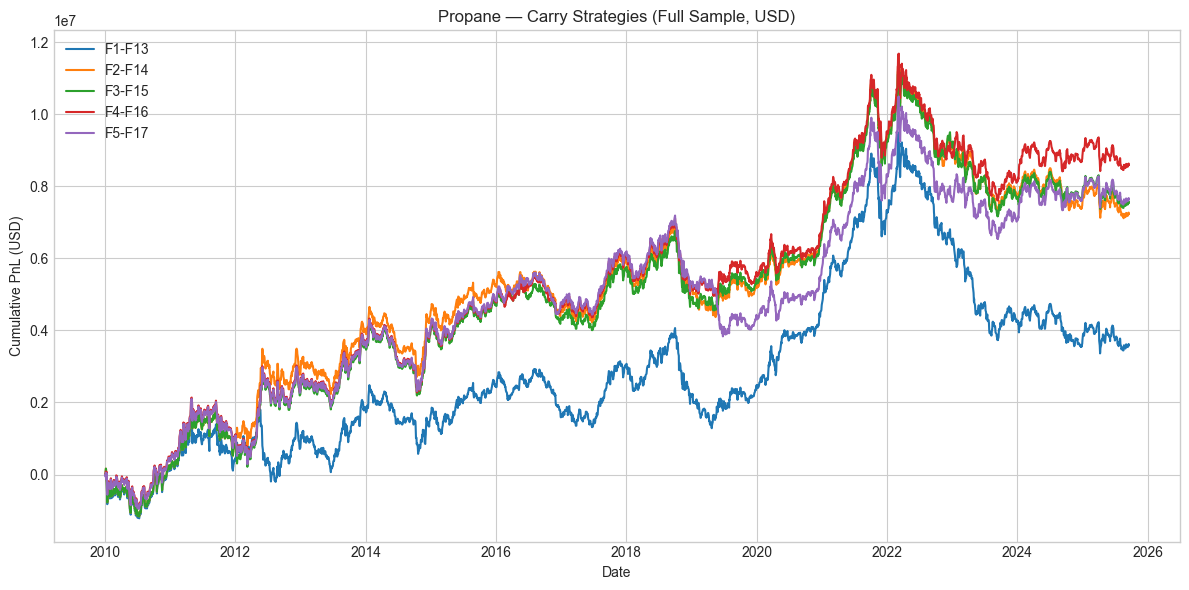

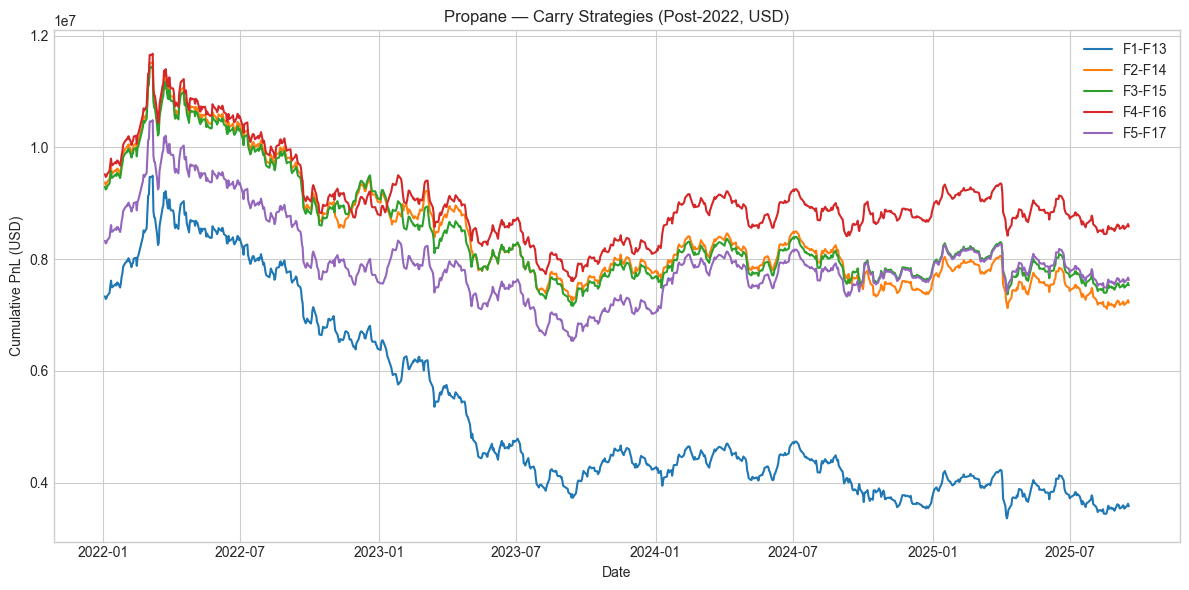

----- Propane — Carry Strategy Metrics (Full / Pre / Post, USD) -----

F1-F13


Total PnL     Total Cost  APL/unit  Std Dev (ann.)  \
Full Sample 0  3,576,510.0000 2,595,600.0000    0.0542          0.2642   
Pre-2022    0  7,261,632.0000 1,936,200.0000    0.1439          0.2588   
Post-2022   0 -3,685,122.0000   659,400.0000   -0.2369          0.2803   

               Sharpe  Drawdown      RoD   Years  
Full Sample 0  0.2050   -0.0143   3.7931 15.7205  
Pre-2022    0  0.5561   -0.0066  21.9555 12.0137  
Post-2022   0 -0.8450   -0.0145 -16.3069  3.7041


F2-F14


Total PnL     Total Cost  APL/unit  Std Dev (ann.)  \
Full Sample 0  7,221,816.0000 2,150,400.0000    0.1094          0.2644   
Pre-2022    0  9,301,446.0000 1,558,200.0000    0.1843          0.2591   
Post-2022   0 -2,079,630.0000   592,200.0000   -0.1337          0.2807   

               Sharpe  Drawdown      RoD   Years  
Full Sample 0  0.4136   -0.0102  10.6731 15.7205  
Pre-2022    0  0.7115   -0.0061  30.2810 12.0137  
Post-2022   0 -0.4762   -0.0105 -12.7630  3.7041


F3-F15


Total PnL     Total Cost  APL/unit  Std Dev (ann.)  \
Full Sample 0  7,532,238.0000 1,906,800.0000    0.1141          0.2643   
Pre-2022    0  9,222,108.0000 1,449,000.0000    0.1828          0.2591   
Post-2022   0 -1,689,870.0000   457,800.0000   -0.1086          0.2806   

               Sharpe  Drawdown      RoD   Years  
Full Sample 0  0.4316   -0.0099  11.4733 15.7205  
Pre-2022    0  0.7055   -0.0053  34.2701 12.0137  
Post-2022   0 -0.3872   -0.0102 -10.6910  3.7041


F4-F16


Total PnL     Total Cost  APL/unit  Std Dev (ann.)  Sharpe  \
Full Sample 0 8,583,204.0000 2,011,800.0000    0.1300          0.2643  0.4919   
Pre-2022    0 9,445,926.0000 1,570,800.0000    0.1872          0.2590  0.7227   
Post-2022   0  -862,722.0000   441,000.0000   -0.0555          0.2806 -0.1977   

               Drawdown     RoD   Years  
Full Sample 0   -0.0094 13.7840 15.7205  
Pre-2022    0   -0.0053 35.1201 12.0137  
Post-2022   0   -0.0096 -5.7514  3.7041


F5-F17


Total PnL     Total Cost  APL/unit  Std Dev (ann.)  Sharpe  \
Full Sample 0 7,625,520.0000 1,999,200.0000    0.1155          0.2641  0.4373   
Pre-2022    0 8,256,234.0000 1,533,000.0000    0.1636          0.2590  0.6318   
Post-2022   0  -630,714.0000   466,200.0000   -0.0405          0.2799 -0.1448   

               Drawdown     RoD   Years  
Full Sample 0   -0.0092 12.5788 15.7205  
Pre-2022    0   -0.0078 20.8493 12.0137  
Post-2022   0   -0.0094 -4.3309  3.7041

===== Completed Propane (BAP) =====


=== Ethane (CAP) | t_cost=0.001 ===
Found sheet 'Ethane (CAP)' for CAP


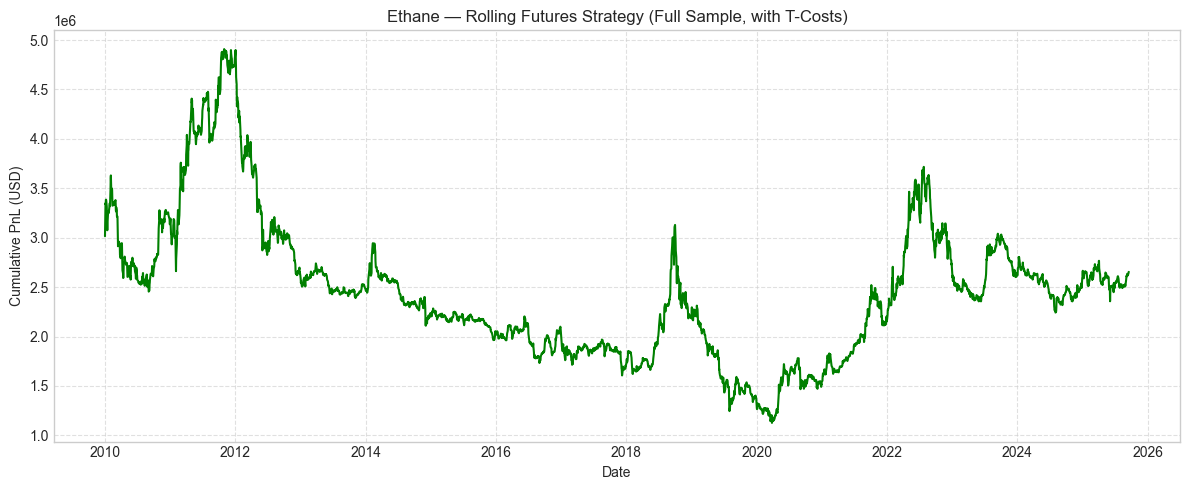

----- Ethane — Rolling Futures Metrics (Full Sample, USD) -----


Total PnL      Total Cost  APL/unit  Std Dev (ann.)  Sharpe  Drawdown  \
0 -364,434.0000 -1,587,600.0000   -0.0055          0.1294 -0.0427   -0.0090   

      RoD   Years  
0 -0.6157 15.7205

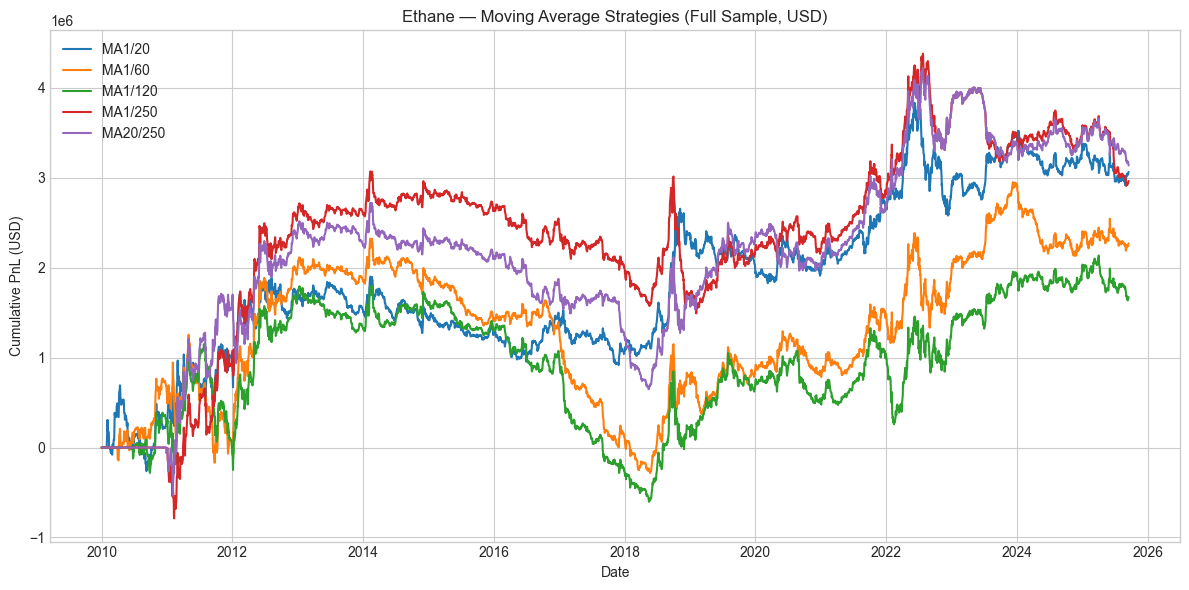

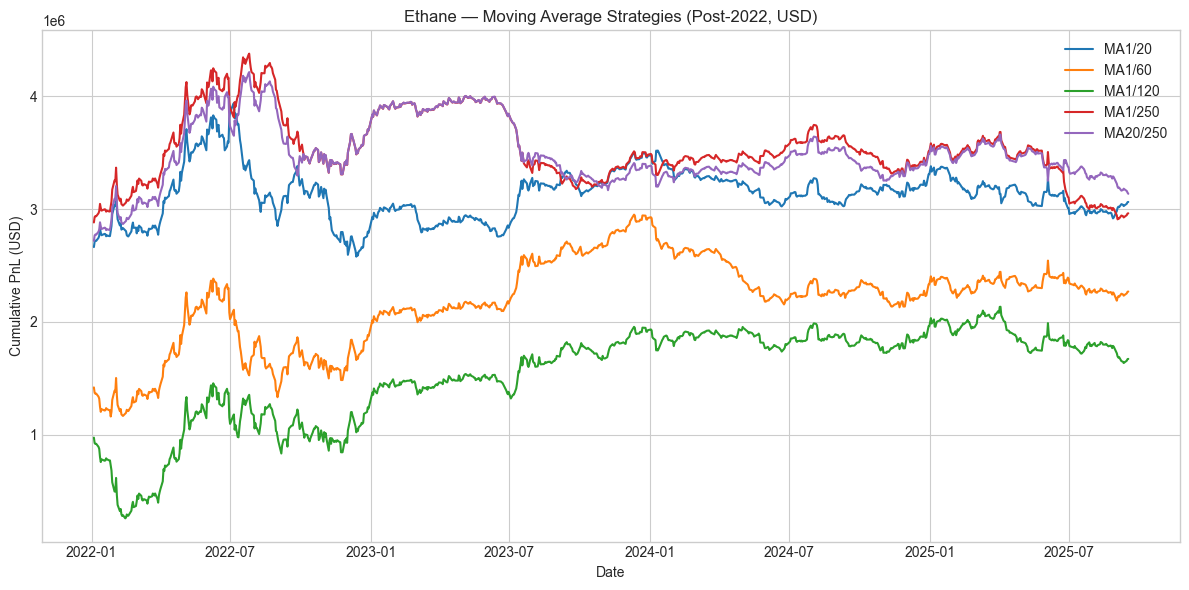

----- Ethane — MA Strategy Metrics (Full / Pre / Post, USD) -----

MA1/20


Total PnL     Total Cost  APL/unit  Std Dev (ann.)  Sharpe  \
Full Sample 0 3,064,740.0000 3,687,600.0000    0.0464          0.1289  0.3601   
Pre-2022    0 2,643,900.0000 2,784,600.0000    0.0524          0.1265  0.4142   
Post-2022   0   420,840.0000   903,000.0000    0.0271          0.1365  0.1982   

               Drawdown     RoD   Years  
Full Sample 0   -0.0032 14.4362 15.7205  
Pre-2022    0   -0.0023 22.4746 12.0137  
Post-2022   0   -0.0032  8.3607  3.7041


MA1/60


Total PnL     Total Cost  APL/unit  Std Dev (ann.)  Sharpe  \
Full Sample 0 2,270,058.0000 2,931,600.0000    0.0344          0.1256  0.2737   
Pre-2022    0 1,440,222.0000 2,196,600.0000    0.0285          0.1224  0.2332   
Post-2022   0   829,836.0000   735,000.0000    0.0533          0.1356  0.3934   

               Drawdown     RoD   Years  
Full Sample 0   -0.0062  5.5704 15.7205  
Pre-2022    0   -0.0062  4.6246 12.0137  
Post-2022   0   -0.0025 21.3501  3.7041


MA1/120


Total PnL     Total Cost  APL/unit  Std Dev (ann.)  Sharpe  \
Full Sample 0 1,672,776.0000 2,314,200.0000    0.0253          0.1239  0.2045   
Pre-2022    0   994,980.0000 1,772,400.0000    0.0197          0.1203  0.1639   
Post-2022   0   677,796.0000   541,800.0000    0.0436          0.1350  0.3226   

               Drawdown     RoD   Years  
Full Sample 0   -0.0057  4.4567 15.7205  
Pre-2022    0   -0.0057  3.4688 12.0137  
Post-2022   0   -0.0017 25.5562  3.7041


MA1/250


Total PnL     Total Cost  APL/unit  Std Dev (ann.)  Sharpe  \
Full Sample 0 2,963,772.0000 1,974,000.0000    0.0449          0.1212  0.3704   
Pre-2022    0 2,862,216.0000 1,465,800.0000    0.0567          0.1166  0.4865   
Post-2022   0   101,556.0000   508,200.0000    0.0065          0.1350  0.0483   

               Drawdown     RoD   Years  
Full Sample 0   -0.0037 12.0303 15.7205  
Pre-2022    0   -0.0037 15.2029 12.0137  
Post-2022   0   -0.0035  1.8724  3.7041


MA20/250


Total PnL     Total Cost  APL/unit  Std Dev (ann.)  Sharpe  \
Full Sample 0 3,136,896.0000 1,671,600.0000    0.0475          0.1205  0.3941   
Pre-2022    0 2,698,836.0000 1,239,000.0000    0.0535          0.1159  0.4615   
Post-2022   0   438,060.0000   432,600.0000    0.0282          0.1345  0.2093   

               Drawdown     RoD   Years  
Full Sample 0   -0.0049  9.6885 15.7205  
Pre-2022    0   -0.0049 10.9075 12.0137  
Post-2022   0   -0.0026 10.9955  3.7041

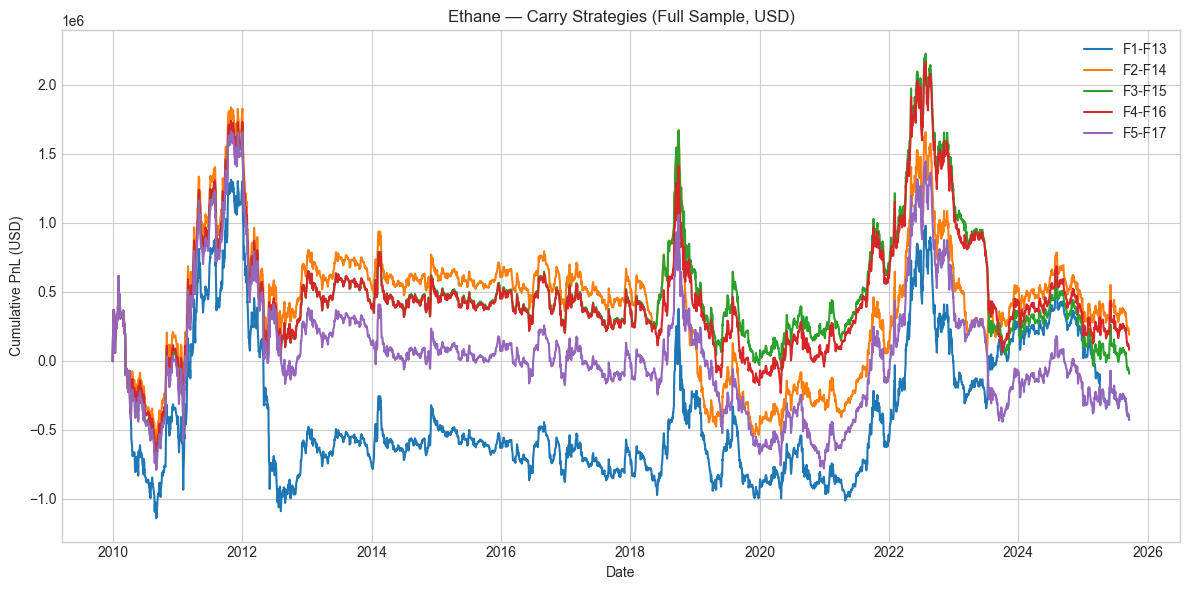

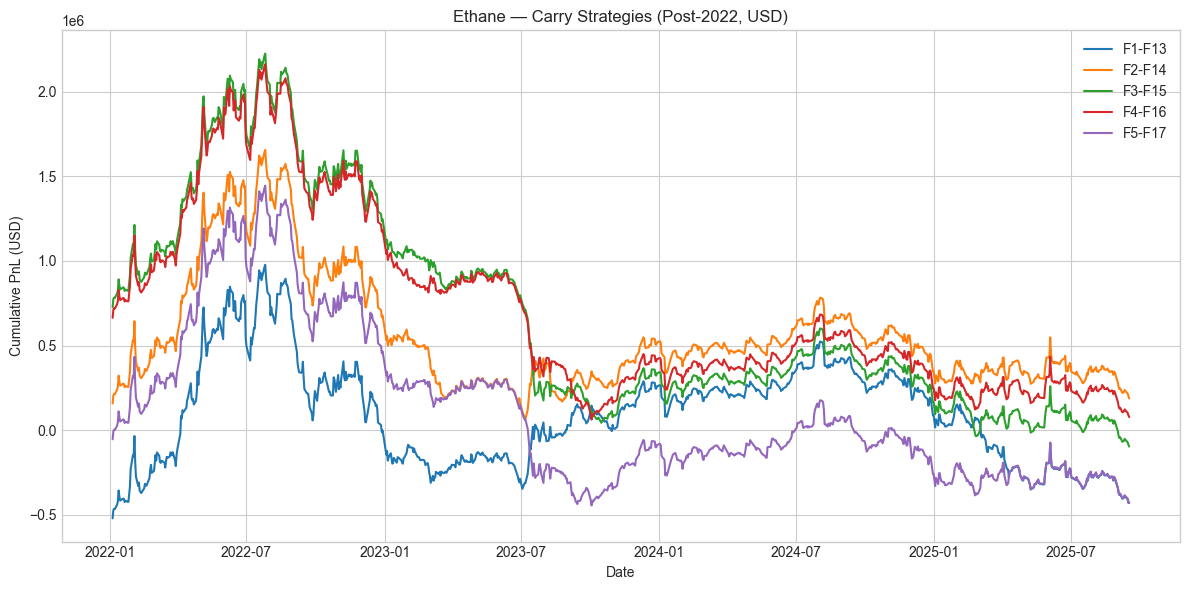

----- Ethane — Carry Strategy Metrics (Full / Pre / Post, USD) -----

F1-F13


Total PnL     Total Cost  APL/unit  Std Dev (ann.)  Sharpe  \
Full Sample 0 -427,518.0000 2,142,000.0000   -0.0065          0.1295 -0.0500   
Pre-2022    0 -540,246.0000 1,642,200.0000   -0.0107          0.1279 -0.0837   
Post-2022   0  112,728.0000   499,800.0000    0.0072          0.1347  0.0538   

               Drawdown     RoD   Years  
Full Sample 0   -0.0057 -1.1359 15.7205  
Pre-2022    0   -0.0057 -1.8783 12.0137  
Post-2022   0   -0.0033  2.1709  3.7041


F2-F14


Total PnL     Total Cost  APL/unit  Std Dev (ann.)  Sharpe  \
Full Sample 0 188,118.0000 2,343,600.0000    0.0028          0.1300  0.0219   
Pre-2022    0 138,012.0000 1,780,800.0000    0.0027          0.1284  0.0213   
Post-2022   0  50,106.0000   562,800.0000    0.0032          0.1351  0.0238   

               Drawdown    RoD   Years  
Full Sample 0   -0.0057 0.5037 15.7205  
Pre-2022    0   -0.0057 0.4835 12.0137  
Post-2022   0   -0.0038 0.8545  3.7041


F3-F15


Total PnL     Total Cost  APL/unit  Std Dev (ann.)  Sharpe  \
Full Sample 0  -95,886.0000 2,259,600.0000   -0.0015          0.1297 -0.0112   
Pre-2022    0  706,272.0000 1,675,800.0000    0.0140          0.1281  0.1093   
Post-2022   0 -802,158.0000   583,800.0000   -0.0516          0.1351 -0.3817   

               Drawdown     RoD   Years  
Full Sample 0   -0.0055 -0.2643 15.7205  
Pre-2022    0   -0.0042  3.3263 12.0137  
Post-2022   0   -0.0055 -9.3695  3.7041


F4-F16


Total PnL     Total Cost  APL/unit  Std Dev (ann.)  Sharpe  \
Full Sample 0   77,994.0000 2,158,800.0000    0.0012          0.1296  0.0091   
Pre-2022    0  643,692.0000 1,659,000.0000    0.0128          0.1280  0.0996   
Post-2022   0 -565,698.0000   499,800.0000   -0.0364          0.1346 -0.2701   

               Drawdown     RoD   Years  
Full Sample 0   -0.0050  0.2377 15.7205  
Pre-2022    0   -0.0047  2.7276 12.0137  
Post-2022   0   -0.0050 -7.3063  3.7041


F5-F17


Total PnL     Total Cost  APL/unit  Std Dev (ann.)  Sharpe  \
Full Sample 0 -428,778.0000 2,058,000.0000   -0.0065          0.1295 -0.0501   
Pre-2022    0  -73,290.0000 1,625,400.0000   -0.0015          0.1279 -0.0114   
Post-2022   0 -355,488.0000   432,600.0000   -0.0229          0.1346 -0.1697   

               Drawdown     RoD   Years  
Full Sample 0   -0.0058 -1.1211 15.7205  
Pre-2022    0   -0.0058 -0.2508 12.0137  
Post-2022   0   -0.0045 -5.1027  3.7041

===== Completed Ethane (CAP) =====


=== Butane (DAE) | t_cost=0.001 ===
Found sheet 'Butane (DAE)' for DAE


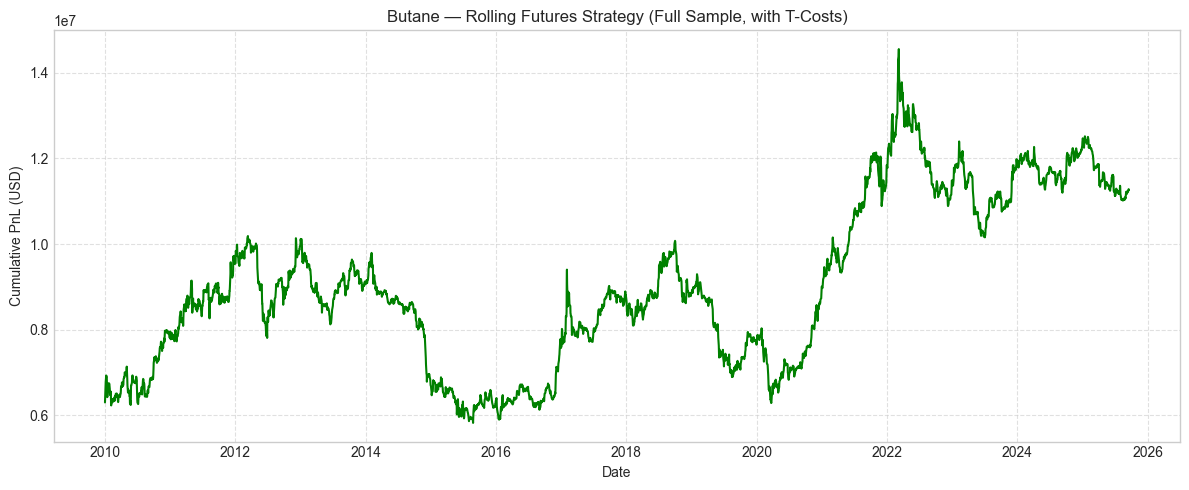

----- Butane — Rolling Futures Metrics (Full Sample, USD) -----


Total PnL      Total Cost  APL/unit  Std Dev (ann.)  Sharpe  Drawdown  \
0 4,961,334.0000 -1,587,600.0000    0.0751          0.2822  0.2663   -0.0103   

     RoD   Years  
0 7.2974 15.7205

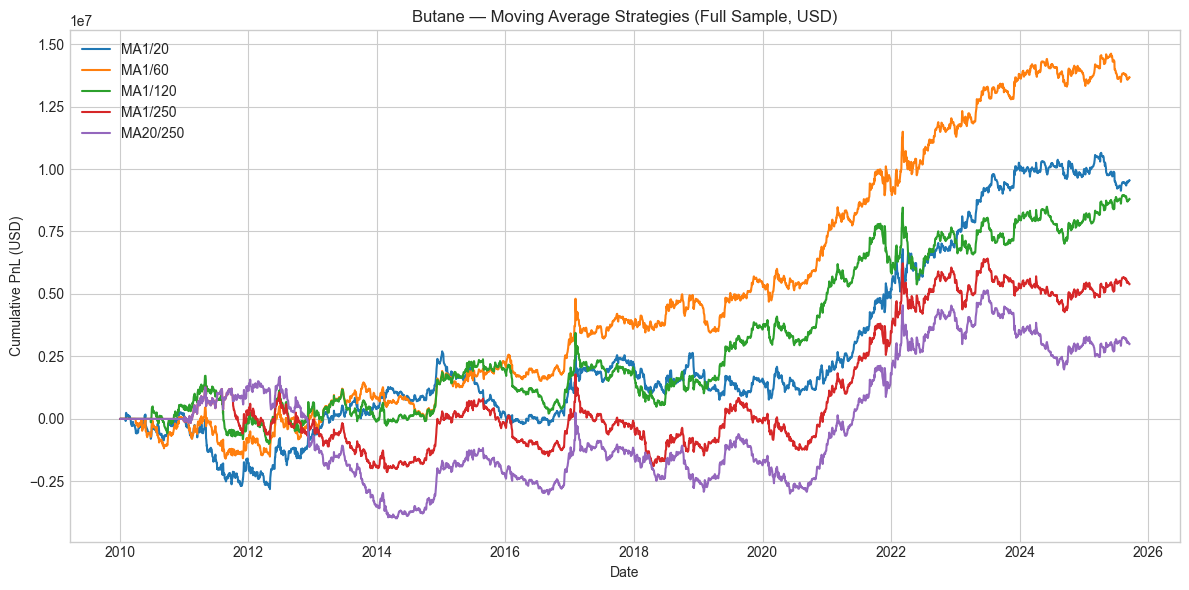

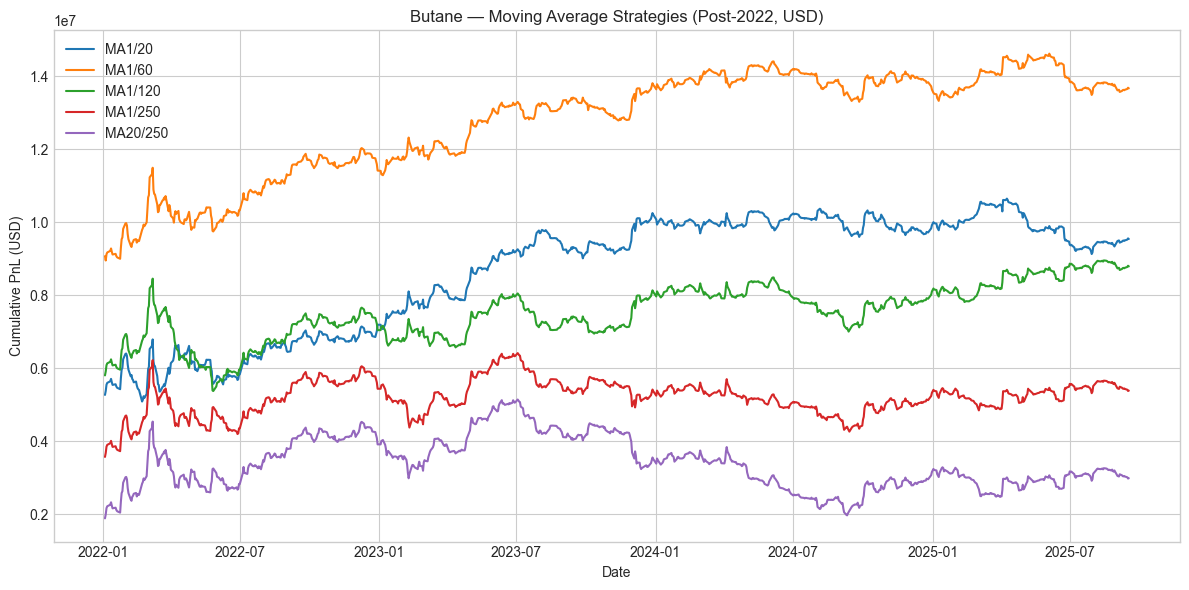

----- Butane — MA Strategy Metrics (Full / Pre / Post, USD) -----

MA1/20


Total PnL     Total Cost  APL/unit  Std Dev (ann.)  Sharpe  \
Full Sample 0 9,542,988.0000 3,956,400.0000    0.1445          0.2820  0.5125   
Pre-2022    0 5,145,882.0000 3,103,800.0000    0.1020          0.2758  0.3697   
Post-2022   0 4,397,106.0000   852,600.0000    0.2826          0.3013  0.9380   

               Drawdown     RoD   Years  
Full Sample 0   -0.0073 19.7632 15.7205  
Pre-2022    0   -0.0073 13.9452 12.0137  
Post-2022   0   -0.0036 79.2886  3.7041


MA1/60


Total PnL     Total Cost  APL/unit  Std Dev (ann.)  \
Full Sample 0 13,668,270.0000 2,662,800.0000    0.2070          0.2795   
Pre-2022    0  9,201,024.0000 2,079,000.0000    0.1824          0.2728   
Post-2022   0  4,467,246.0000   583,800.0000    0.2871          0.3007   

               Sharpe  Drawdown     RoD   Years  
Full Sample 0  0.7405   -0.0049 42.4857 15.7205  
Pre-2022    0  0.6685   -0.0049 37.4246 12.0137  
Post-2022   0  0.9551   -0.0041 69.5232  3.7041


MA1/120


Total PnL     Total Cost  APL/unit  Std Dev (ann.)  Sharpe  \
Full Sample 0 8,793,750.0000 2,339,400.0000    0.1332          0.2771  0.4806   
Pre-2022    0 5,944,344.0000 1,755,600.0000    0.1178          0.2694  0.4372   
Post-2022   0 2,849,406.0000   583,800.0000    0.1832          0.3008  0.6088   

               Drawdown     RoD   Years  
Full Sample 0   -0.0072 18.5449 15.7205  
Pre-2022    0   -0.0070 16.8641 12.0137  
Post-2022   0   -0.0073 25.1490  3.7041


MA1/250


Total PnL     Total Cost  APL/unit  Std Dev (ann.)  Sharpe  \
Full Sample 0 5,390,658.0000 2,167,200.0000    0.0816          0.2736  0.2984   
Pre-2022    0 3,448,620.0000 1,701,000.0000    0.0683          0.2648  0.2581   
Post-2022   0 1,942,038.0000   466,200.0000    0.1248          0.3008  0.4150   

               Drawdown     RoD   Years  
Full Sample 0   -0.0087  9.3888 15.7205  
Pre-2022    0   -0.0087  7.8597 12.0137  
Post-2022   0   -0.0051 24.5551  3.7041


MA20/250


Total PnL     Total Cost  APL/unit  Std Dev (ann.)  Sharpe  \
Full Sample 0 2,993,046.0000 1,747,200.0000    0.0453          0.2730  0.1661   
Pre-2022    0 1,766,352.0000 1,331,400.0000    0.0350          0.2641  0.1326   
Post-2022   0 1,226,694.0000   415,800.0000    0.0789          0.3004  0.2625   

               Drawdown     RoD   Years  
Full Sample 0   -0.0135  3.3677 15.7205  
Pre-2022    0   -0.0135  2.6007 12.0137  
Post-2022   0   -0.0075 10.5219  3.7041

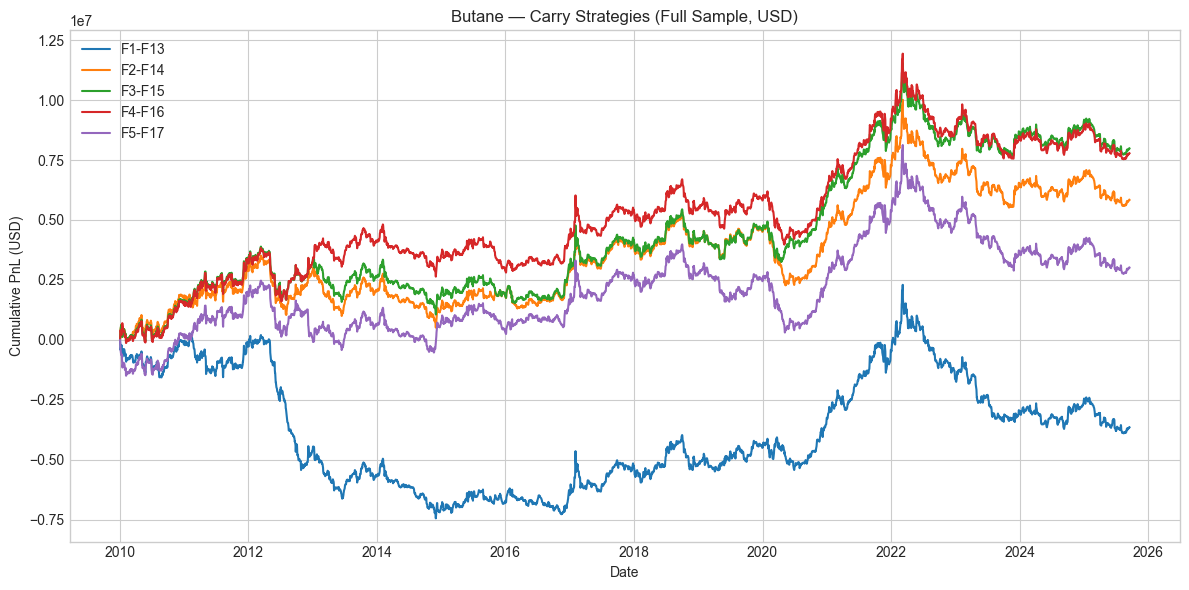

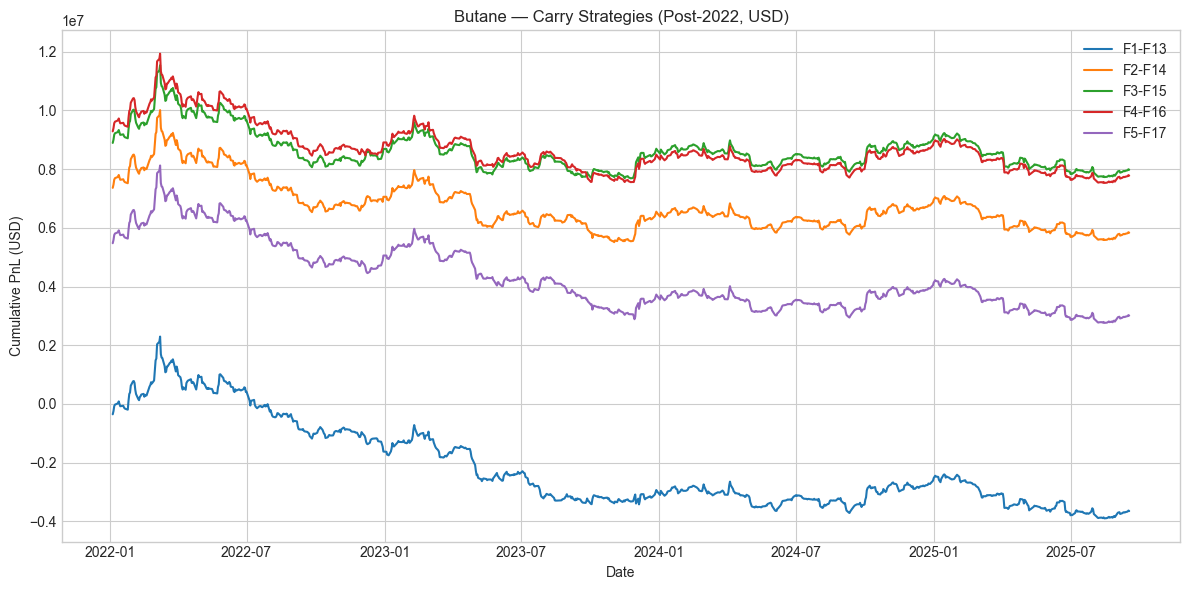

----- Butane — Carry Strategy Metrics (Full / Pre / Post, USD) -----

F1-F13


Total PnL     Total Cost  APL/unit  Std Dev (ann.)  \
Full Sample 0 -3,653,538.0000 2,688,000.0000   -0.0553          0.2823   
Pre-2022    0   -483,420.0000 2,146,200.0000   -0.0096          0.2766   
Post-2022   0 -3,170,118.0000   541,800.0000   -0.2038          0.3002   

               Sharpe  Drawdown      RoD   Years  
Full Sample 0 -0.1960   -0.0183  -3.0202 15.7205  
Pre-2022    0 -0.0346   -0.0183  -0.5229 12.0137  
Post-2022   0 -0.6788   -0.0147 -13.9043  3.7041


F2-F14


Total PnL     Total Cost  APL/unit  Std Dev (ann.)  \
Full Sample 0  5,834,346.0000 2,184,000.0000    0.0884          0.2825   
Pre-2022    0  7,235,550.0000 1,684,200.0000    0.1434          0.2768   
Post-2022   0 -1,401,204.0000   499,800.0000   -0.0901          0.3005   

               Sharpe  Drawdown     RoD   Years  
Full Sample 0  0.3127   -0.0105  8.4442 15.7205  
Pre-2022    0  0.5181   -0.0072 19.9773 12.0137  
Post-2022   0 -0.2998   -0.0106 -8.4622  3.7041


F3-F15


Total PnL     Total Cost  APL/unit  Std Dev (ann.)  Sharpe  \
Full Sample 0 7,979,622.0000 2,226,000.0000    0.1209          0.2824  0.4279   
Pre-2022    0 8,766,912.0000 1,734,600.0000    0.1737          0.2766  0.6282   
Post-2022   0  -787,290.0000   491,400.0000   -0.0506          0.3006 -0.1683   

               Drawdown     RoD   Years  
Full Sample 0   -0.0089 13.5268 15.7205  
Pre-2022    0   -0.0067 26.0000 12.0137  
Post-2022   0   -0.0091 -5.5490  3.7041


F4-F16


Total PnL     Total Cost  APL/unit  Std Dev (ann.)  \
Full Sample 0  7,779,828.0000 2,192,400.0000    0.1178          0.2824   
Pre-2022    0  9,160,578.0000 1,701,000.0000    0.1816          0.2765   
Post-2022   0 -1,380,750.0000   491,400.0000   -0.0888          0.3005   

               Sharpe  Drawdown     RoD   Years  
Full Sample 0  0.4172   -0.0102 11.5499 15.7205  
Pre-2022    0  0.6565   -0.0064 28.4089 12.0137  
Post-2022   0 -0.2953   -0.0104 -8.5153  3.7041


F5-F17


Total PnL     Total Cost  APL/unit  Std Dev (ann.)  \
Full Sample 0  3,009,090.0000 2,259,600.0000    0.0456          0.2826   
Pre-2022    0  5,348,238.0000 1,810,200.0000    0.1060          0.2768   
Post-2022   0 -2,339,148.0000   449,400.0000   -0.1504          0.3003   

               Sharpe  Drawdown      RoD   Years  
Full Sample 0  0.1613   -0.0125   3.6369 15.7205  
Pre-2022    0  0.3829   -0.0087  12.2208 12.0137  
Post-2022   0 -0.5007   -0.0127 -11.8488  3.7041

===== Completed Butane (DAE) =====


=== WTI (CL) | t_cost=0.01 ===
Found sheet 'WTI (CL)' for CL


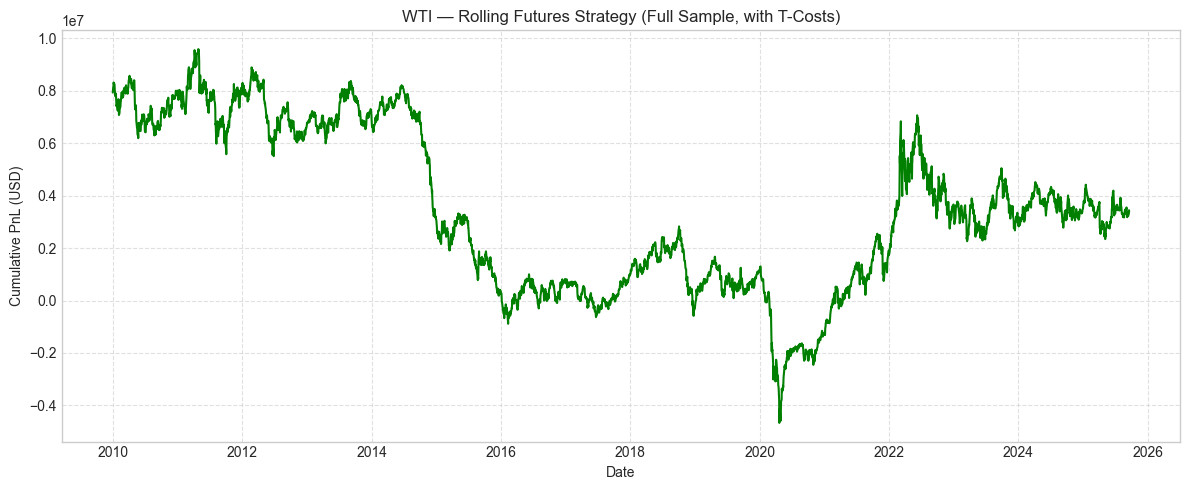

----- WTI — Rolling Futures Metrics (Full Sample, USD) -----


Total PnL    Total Cost  APL/unit  Std Dev (ann.)  Sharpe  Drawdown  \
0 -4,539,000.0000 -378,000.0000   -2.8873         24.3583 -0.1185   -1.2233   

      RoD   Years  
0 -2.3603 15.7205

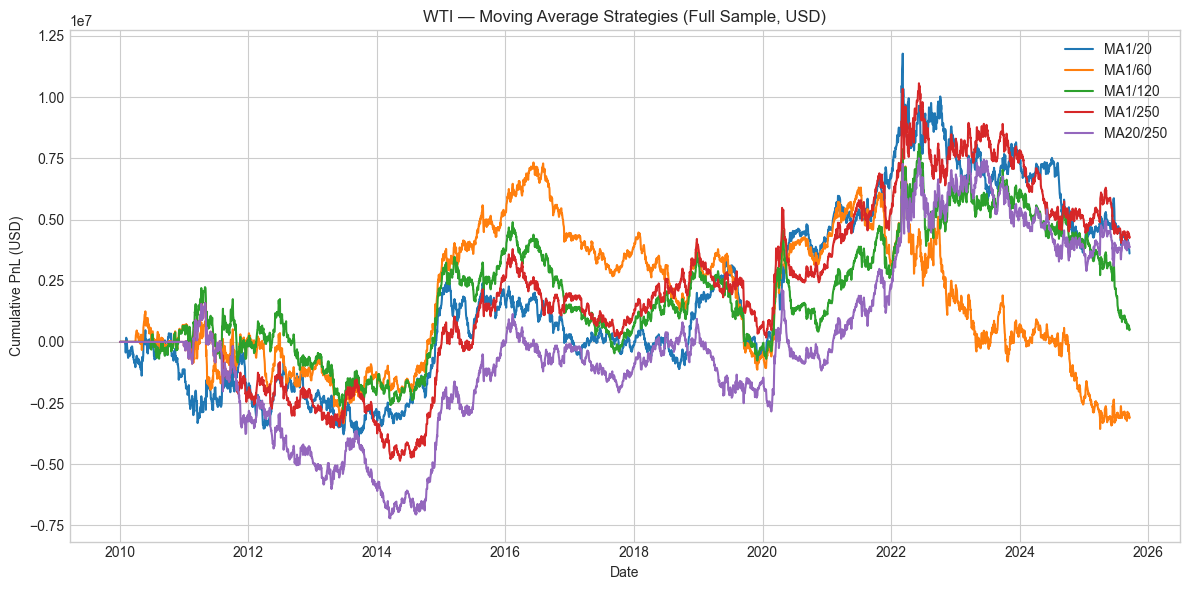

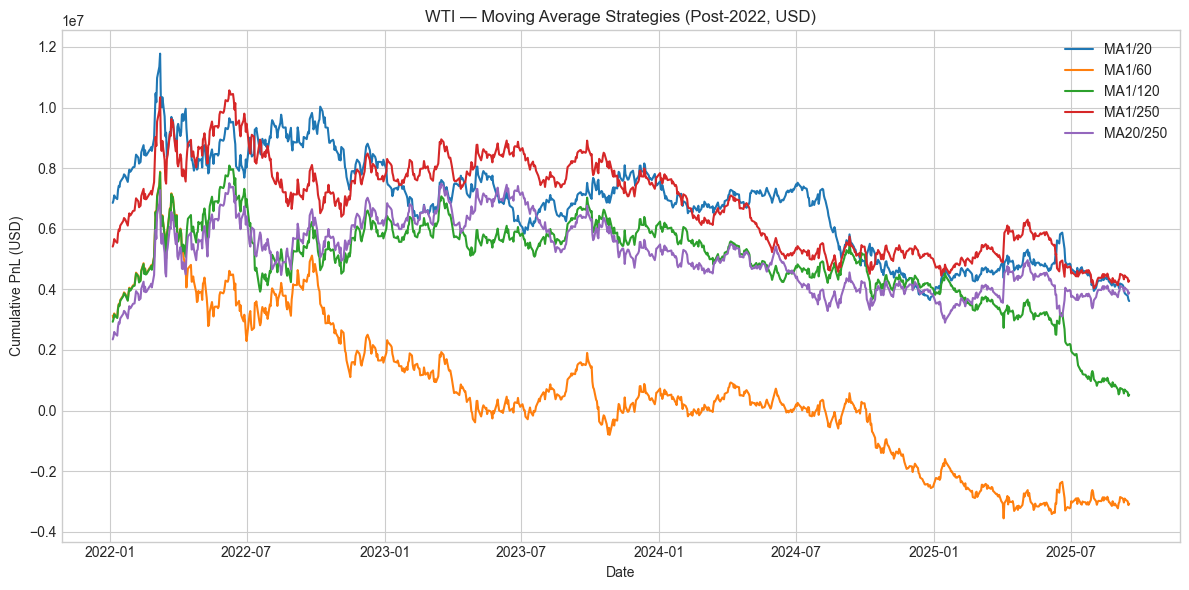

----- WTI — MA Strategy Metrics (Full / Pre / Post, USD) -----

MA1/20


Total PnL     Total Cost  APL/unit  Std Dev (ann.)  \
Full Sample 0  3,612,000.0000 1,244,000.0000    2.2976         24.3651   
Pre-2022    0  6,762,000.0000   917,000.0000    5.6286         21.7216   
Post-2022   0 -3,150,000.0000   327,000.0000   -8.5041         31.4705   

               Sharpe  Drawdown      RoD   Years  
Full Sample 0  0.0943   -0.4192   5.4809 15.7205  
Pre-2022    0  0.2591   -0.4192  13.4268 12.0137  
Post-2022   0 -0.2702   -0.5438 -15.6377  3.7041


MA1/60


Total PnL   Total Cost  APL/unit  Std Dev (ann.)  Sharpe  \
Full Sample 0 -3,075,000.0000 894,000.0000   -1.9560         24.2470 -0.0807   
Pre-2022    0  3,223,000.0000 665,000.0000    2.6828         21.5567  0.1245   
Post-2022   0 -6,298,000.0000 229,000.0000  -17.0027         31.4423 -0.5408   

               Drawdown      RoD   Years  
Full Sample 0   -0.6398  -3.0571 15.7205  
Pre-2022    0   -0.4885   5.4916 12.0137  
Post-2022   0   -0.7805 -21.7847  3.7041


MA1/120


Total PnL   Total Cost  APL/unit  Std Dev (ann.)  Sharpe  \
Full Sample 0    523,000.0000 696,000.0000    0.3327         24.0531  0.0138   
Pre-2022    0  2,839,000.0000 525,000.0000    2.3631         21.2769  0.1111   
Post-2022   0 -2,316,000.0000 171,000.0000   -6.2525         31.4439 -0.1988   

               Drawdown      RoD   Years  
Full Sample 0   -0.4207   0.7908 15.7205  
Pre-2022    0   -0.4109   5.7511 12.0137  
Post-2022   0   -0.4990 -12.5289  3.7041


MA1/250


Total PnL   Total Cost  APL/unit  Std Dev (ann.)  Sharpe  \
Full Sample 0  4,290,000.0000 598,000.0000    2.7289         23.7649  0.1148   
Pre-2022    0  5,320,000.0000 435,000.0000    4.4283         20.8508  0.2124   
Post-2022   0 -1,030,000.0000 163,000.0000   -2.7807         31.4417 -0.0884   

               Drawdown     RoD   Years  
Full Sample 0   -0.5564  4.9043 15.7205  
Pre-2022    0   -0.5564  7.9584 12.0137  
Post-2022   0   -0.4283 -6.4927  3.7041


MA20/250


Total PnL   Total Cost  APL/unit  Std Dev (ann.)  Sharpe  \
Full Sample 0 3,892,000.0000 414,000.0000    2.4757         23.7567  0.1042   
Pre-2022    0 2,256,000.0000 311,000.0000    1.8779         20.8448  0.0901   
Post-2022   0 1,636,000.0000 103,000.0000    4.4167         31.4305  0.1405   

               Drawdown     RoD   Years  
Full Sample 0   -0.7593  3.2607 15.7205  
Pre-2022    0   -0.7593  2.4732 12.0137  
Post-2022   0   -0.3020 14.6268  3.7041

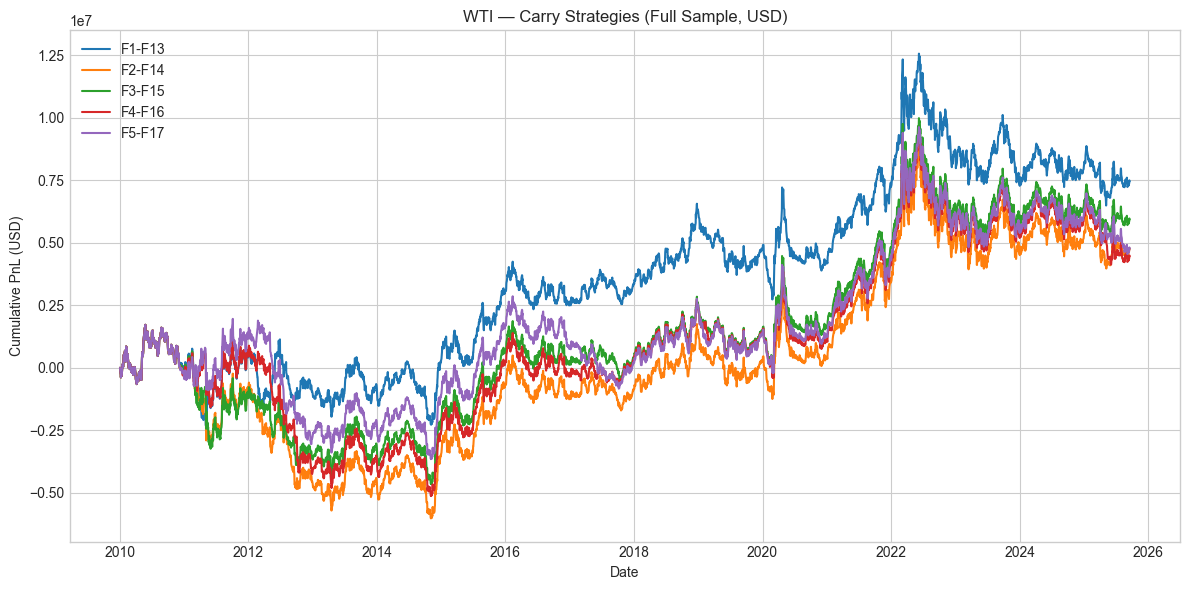

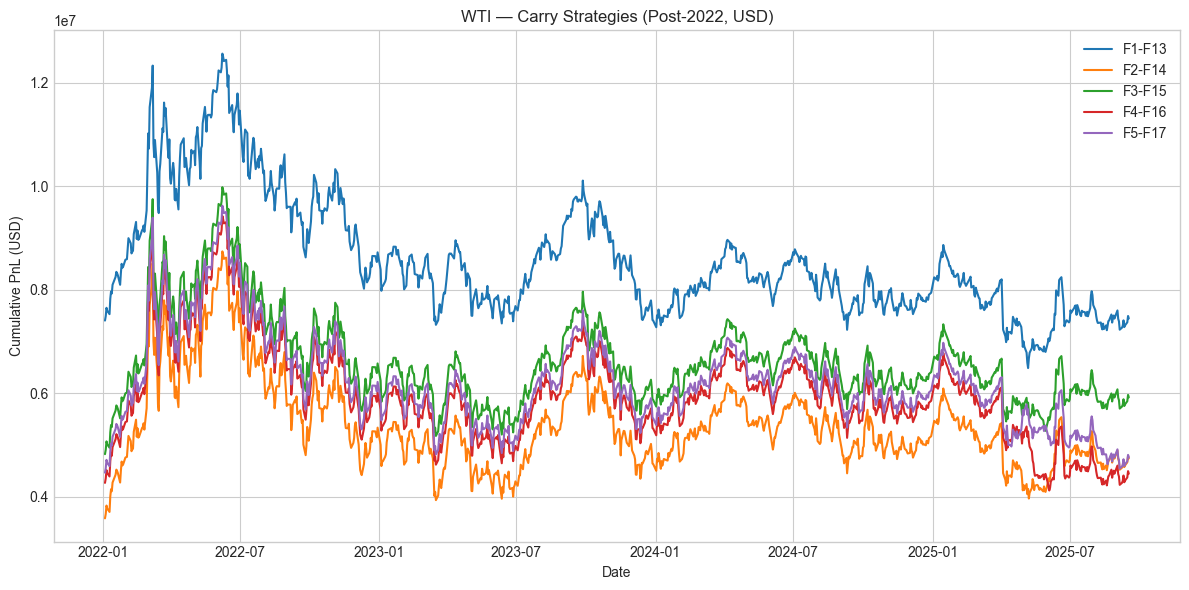

----- WTI — Carry Strategy Metrics (Full / Pre / Post, USD) -----

F1-F13


Total PnL   Total Cost  APL/unit  Std Dev (ann.)  Sharpe  \
Full Sample 0 7,447,000.0000 492,000.0000    4.7371         24.3601  0.1945   
Pre-2022    0 7,315,000.0000 393,000.0000    6.0889         21.7334  0.2802   
Post-2022   0   132,000.0000  99,000.0000    0.3564         31.4356  0.0113   

               Drawdown     RoD   Years  
Full Sample 0   -0.3439 13.7741 15.7205  
Pre-2022    0   -0.3439 17.7046 12.0137  
Post-2022   0   -0.3983  0.8947  3.7041


F2-F14


Total PnL   Total Cost  APL/unit  Std Dev (ann.)  Sharpe  \
Full Sample 0 4,743,000.0000 480,000.0000    3.0171         24.3608  0.1238   
Pre-2022    0 3,495,000.0000 387,000.0000    2.9092         21.7359  0.1338   
Post-2022   0 1,248,000.0000  93,000.0000    3.3692         31.4340  0.1072   

               Drawdown     RoD   Years  
Full Sample 0   -0.6604  4.5683 15.7205  
Pre-2022    0   -0.6604  4.4049 12.0137  
Post-2022   0   -0.3151 10.6933  3.7041


F3-F15


Total PnL   Total Cost  APL/unit  Std Dev (ann.)  Sharpe  \
Full Sample 0 5,923,000.0000 474,000.0000    3.7677         24.3607  0.1547   
Pre-2022    0 4,735,000.0000 373,000.0000    3.9413         21.7355  0.1813   
Post-2022   0 1,188,000.0000 101,000.0000    3.2072         31.4345  0.1020   

               Drawdown     RoD   Years  
Full Sample 0   -0.5430  6.9385 15.7205  
Pre-2022    0   -0.5430  7.2583 12.0137  
Post-2022   0   -0.3151 10.1792  3.7041


F4-F16


Total PnL   Total Cost  APL/unit  Std Dev (ann.)  Sharpe  \
Full Sample 0 4,450,000.0000 472,000.0000    2.8307         24.3623  0.1162   
Pre-2022    0 4,180,000.0000 369,000.0000    3.4794         21.7367  0.1601   
Post-2022   0   270,000.0000 103,000.0000    0.7289         31.4365  0.0232   

               Drawdown    RoD   Years  
Full Sample 0   -0.5836 4.8501 15.7205  
Pre-2022    0   -0.5836 5.9616 12.0137  
Post-2022   0   -0.3478 2.0958  3.7041


F5-F17


Total PnL   Total Cost  APL/unit  Std Dev (ann.)  Sharpe  \
Full Sample 0 4,764,000.0000 518,000.0000    3.0304         24.3588  0.1244   
Pre-2022    0 4,378,000.0000 411,000.0000    3.6442         21.7325  0.1677   
Post-2022   0   386,000.0000 107,000.0000    1.0421         31.4345  0.0332   

               Drawdown    RoD   Years  
Full Sample 0   -0.4691 6.4596 15.7205  
Pre-2022    0   -0.4691 7.7678 12.0137  
Post-2022   0   -0.3330 3.1289  3.7041

===== Completed WTI (CL) =====


=== Brent (CO) | t_cost=0.01 ===
Found sheet 'Brent (CO)' for CO


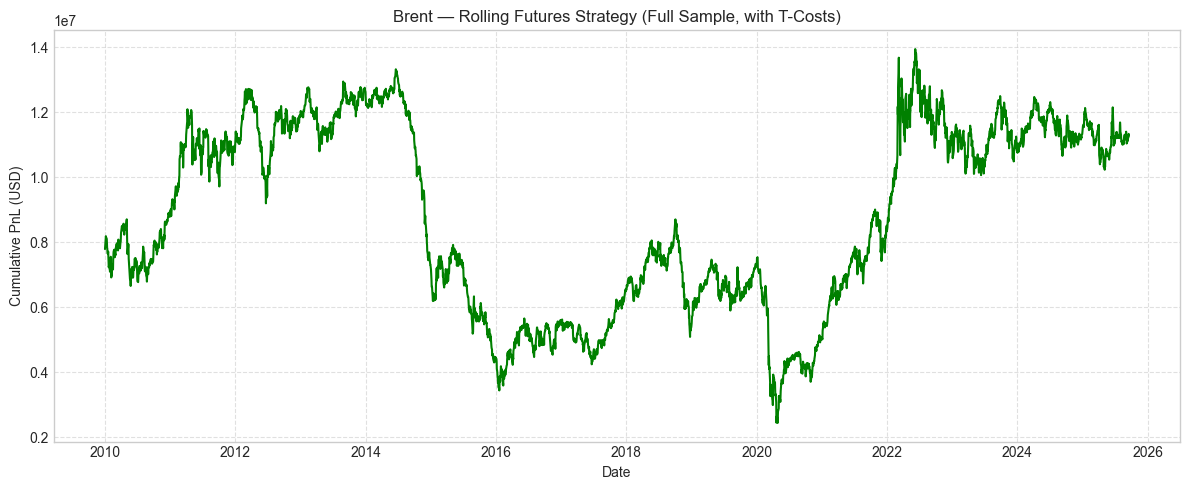

----- Brent — Rolling Futures Metrics (Full Sample, USD) -----


Total PnL    Total Cost  APL/unit  Std Dev (ann.)  Sharpe  Drawdown  \
0 3,488,000.0000 -380,000.0000    2.2188         24.0482  0.0923   -0.7001   

     RoD   Years  
0 3.1691 15.7205

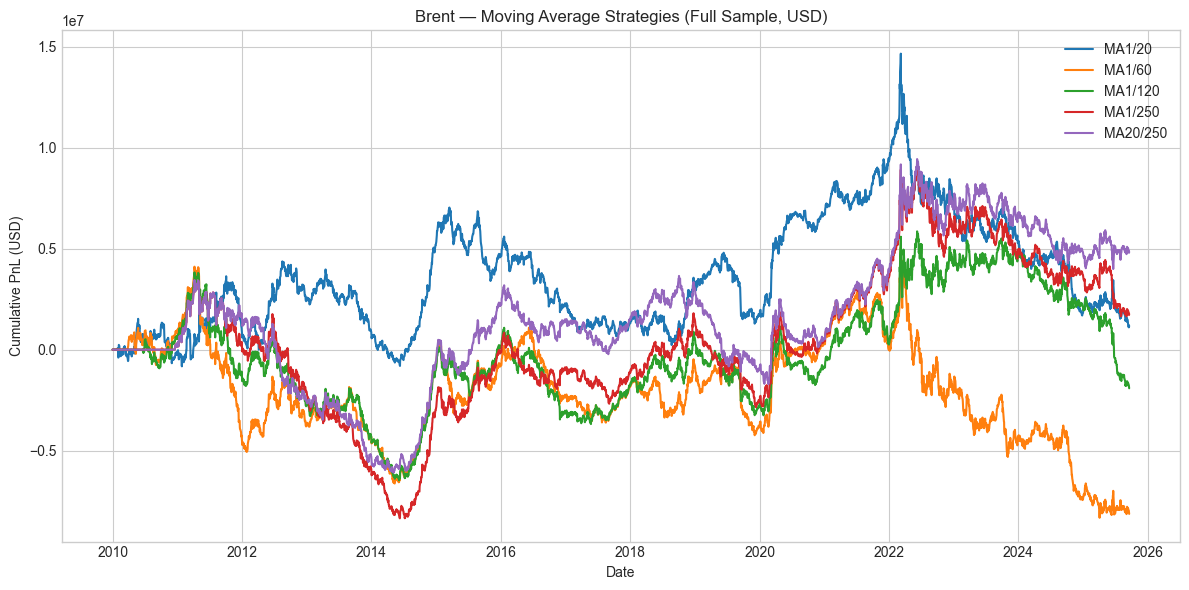

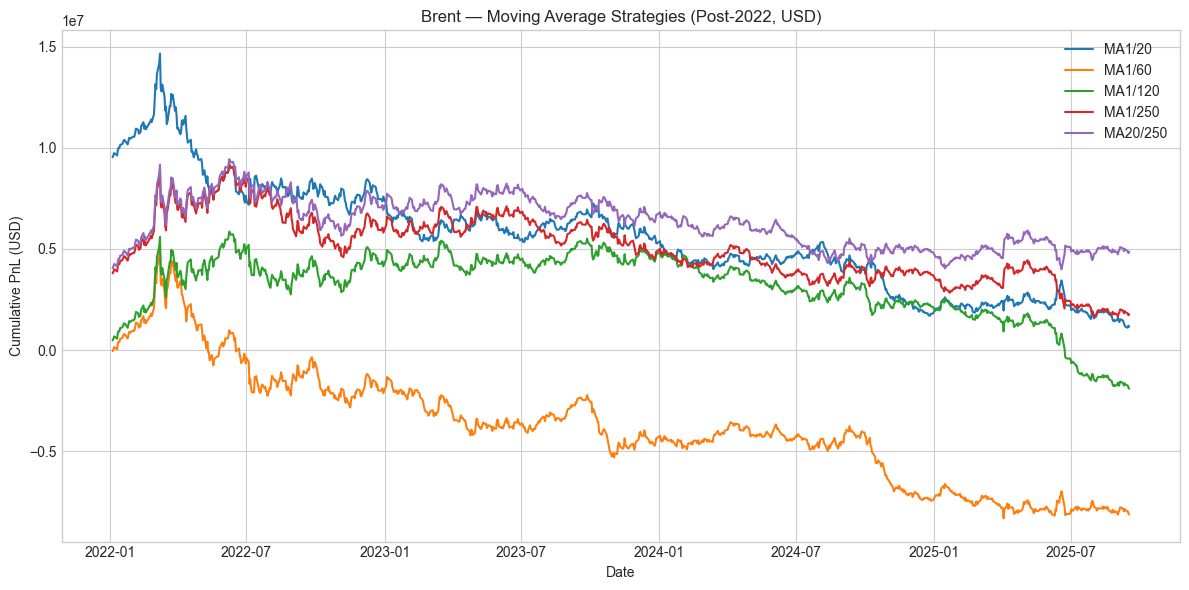

----- Brent — MA Strategy Metrics (Full / Pre / Post, USD) -----

MA1/20


Total PnL     Total Cost  APL/unit  Std Dev (ann.)  \
Full Sample 0  1,154,000.0000 1,296,000.0000    0.7341         24.0596   
Pre-2022    0  9,435,000.0000   955,000.0000    7.8535         21.4799   
Post-2022   0 -8,281,000.0000   341,000.0000  -22.3562         30.9463   

               Sharpe  Drawdown      RoD   Years  
Full Sample 0  0.0305   -0.5496   1.3356 15.7205  
Pre-2022    0  0.3656   -0.3994  19.6610 12.0137  
Post-2022   0 -0.7224   -0.8903 -25.1097  3.7041


MA1/60


Total PnL   Total Cost  APL/unit  Std Dev (ann.)  Sharpe  \
Full Sample 0 -8,130,000.0000 935,000.0000   -5.1716         23.9448 -0.2160   
Pre-2022    0     50,000.0000 683,000.0000    0.0416         21.3253  0.0020   
Post-2022   0 -8,180,000.0000 252,000.0000  -22.0836         30.9348 -0.7139   

               Drawdown      RoD   Years  
Full Sample 0   -0.8887  -5.8194 15.7205  
Pre-2022    0   -0.7609   0.0547 12.0137  
Post-2022   0   -0.8916 -24.7675  3.7041


MA1/120


Total PnL   Total Cost  APL/unit  Std Dev (ann.)  Sharpe  \
Full Sample 0 -1,912,000.0000 750,000.0000   -1.2162         23.7622 -0.0512   
Pre-2022    0    373,000.0000 559,000.0000    0.3105         21.0599  0.0147   
Post-2022   0 -2,285,000.0000 191,000.0000   -6.1688         30.9475 -0.1993   

               Drawdown      RoD   Years  
Full Sample 0   -0.7445  -1.6336 15.7205  
Pre-2022    0   -0.7445   0.4170 12.0137  
Post-2022   0   -0.5017 -12.2948  3.7041


MA1/250


Total PnL   Total Cost  APL/unit  Std Dev (ann.)  Sharpe  \
Full Sample 0  1,767,000.0000 654,000.0000    1.1240         23.5061  0.0478   
Pre-2022    0  3,692,000.0000 487,000.0000    3.0732         20.6816  0.1486   
Post-2022   0 -1,925,000.0000 167,000.0000   -5.1969         30.9437 -0.1679   

               Drawdown      RoD   Years  
Full Sample 0   -0.8774   1.2811 15.7205  
Pre-2022    0   -0.8774   3.5027 12.0137  
Post-2022   0   -0.4861 -10.6907  3.7041


MA20/250


Total PnL   Total Cost  APL/unit  Std Dev (ann.)  Sharpe  \
Full Sample 0 4,847,000.0000 426,000.0000    3.0832         23.4931  0.1312   
Pre-2022    0 3,952,000.0000 321,000.0000    3.2896         20.6696  0.1592   
Post-2022   0   895,000.0000 105,000.0000    2.4162         30.9309  0.0781   

               Drawdown    RoD   Years  
Full Sample 0   -0.7092 4.3476 15.7205  
Pre-2022    0   -0.7092 4.6386 12.0137  
Post-2022   0   -0.3515 6.8736  3.7041

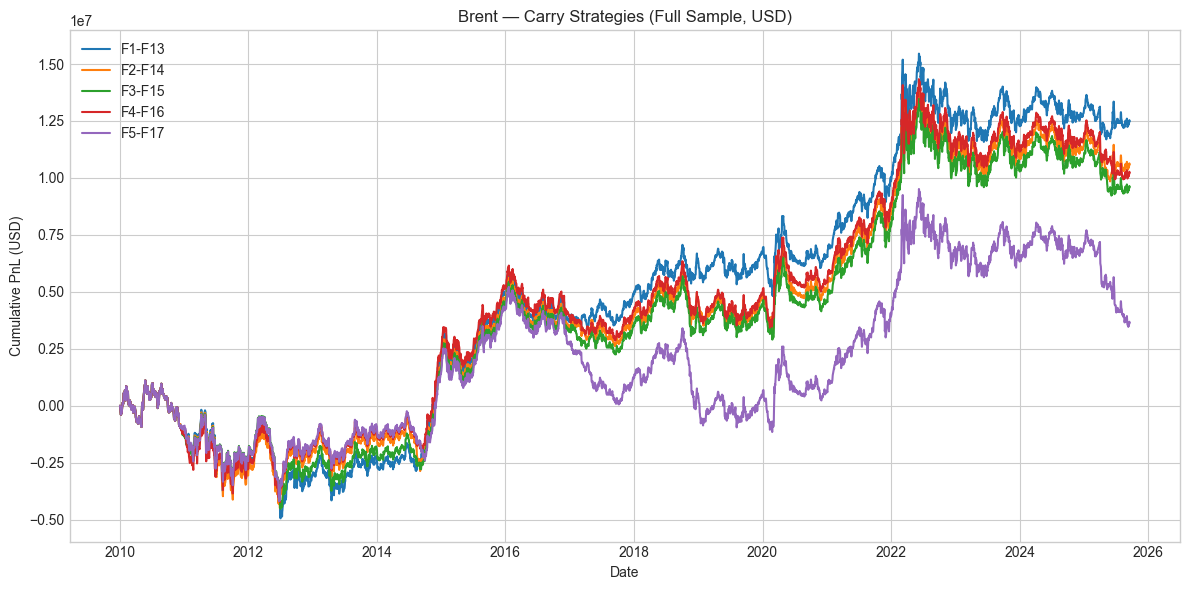

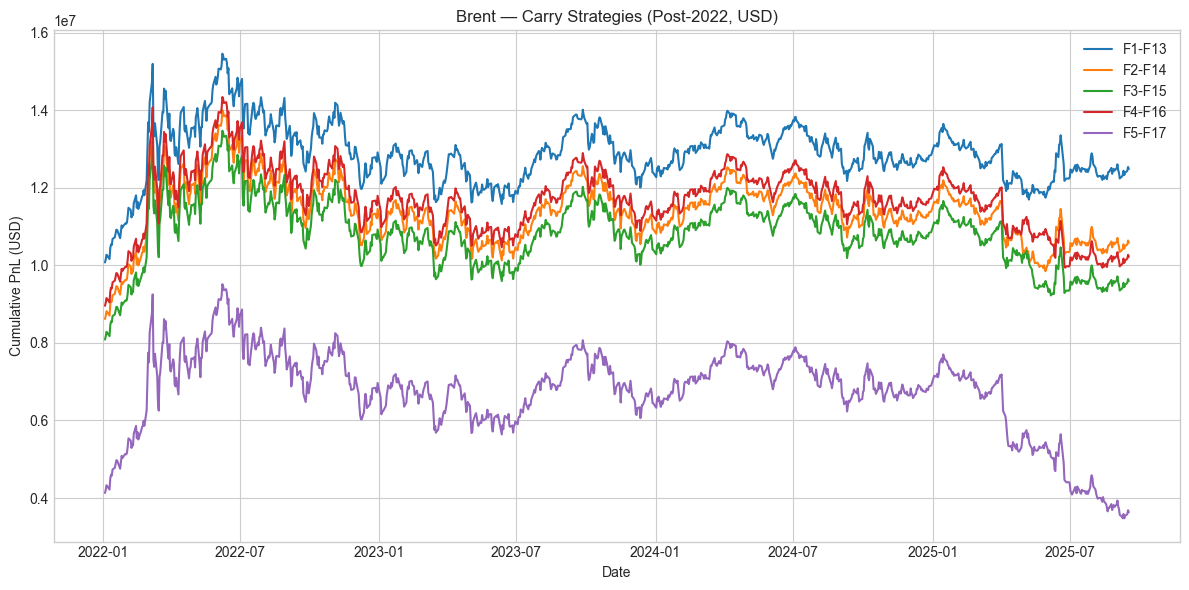

----- Brent — Carry Strategy Metrics (Full / Pre / Post, USD) -----

F1-F13


Total PnL   Total Cost  APL/unit  Std Dev (ann.)  Sharpe  \
Full Sample 0 12,482,000.0000 456,000.0000    7.9399         24.0440  0.3302   
Pre-2022    0  9,971,000.0000 363,000.0000    8.2997         21.4821  0.3864   
Post-2022   0  2,511,000.0000  93,000.0000    6.7790         30.9321  0.2192   

               Drawdown     RoD   Years  
Full Sample 0   -0.5449 14.5712 15.7205  
Pre-2022    0   -0.5449 15.2314 12.0137  
Post-2022   0   -0.2502 27.0948  3.7041


F2-F14


Total PnL   Total Cost  APL/unit  Std Dev (ann.)  Sharpe  \
Full Sample 0 10,586,000.0000 472,000.0000    6.7339         24.0455  0.2800   
Pre-2022    0  8,515,000.0000 375,000.0000    7.0877         21.4837  0.3299   
Post-2022   0  2,071,000.0000  97,000.0000    5.5911         30.9335  0.1807   

               Drawdown     RoD   Years  
Full Sample 0   -0.5048 13.3405 15.7205  
Pre-2022    0   -0.5048 14.0415 12.0137  
Post-2022   0   -0.2681 20.8508  3.7041


F3-F15


Total PnL   Total Cost  APL/unit  Std Dev (ann.)  Sharpe  \
Full Sample 0 9,593,000.0000 462,000.0000    6.1022         24.0459  0.2538   
Pre-2022    0 7,984,000.0000 361,000.0000    6.6457         21.4838  0.3093   
Post-2022   0 1,609,000.0000 101,000.0000    4.3438         30.9344  0.1404   

               Drawdown     RoD   Years  
Full Sample 0   -0.5071 12.0333 15.7205  
Pre-2022    0   -0.5071 13.1052 12.0137  
Post-2022   0   -0.2742 15.8445  3.7041


F4-F16


Total PnL   Total Cost  APL/unit  Std Dev (ann.)  Sharpe  \
Full Sample 0 10,218,000.0000 482,000.0000    6.4998         24.0427  0.2703   
Pre-2022    0  8,853,000.0000 381,000.0000    7.3691         21.4783  0.3431   
Post-2022   0  1,365,000.0000 101,000.0000    3.6851         30.9358  0.1191   

               Drawdown     RoD   Years  
Full Sample 0   -0.4803 13.5330 15.7205  
Pre-2022    0   -0.4803 15.3429 12.0137  
Post-2022   0   -0.2841 12.9711  3.7041


F5-F17


Total PnL   Total Cost  APL/unit  Std Dev (ann.)  Sharpe  \
Full Sample 0 3,634,000.0000 515,000.0000    2.3116         24.0462  0.0961   
Pre-2022    0 4,029,000.0000 400,000.0000    3.3537         21.4822  0.1561   
Post-2022   0  -395,000.0000 115,000.0000   -1.0664         30.9382 -0.0345   

               Drawdown     RoD   Years  
Full Sample 0   -0.4765  4.8511 15.7205  
Pre-2022    0   -0.4765  7.0380 12.0137  
Post-2022   0   -0.3898 -2.7356  3.7041

===== Completed Brent (CO) =====


=== ULSD (HO) | t_cost=0.05 ===
Found sheet 'ULSD (HO)' for HO


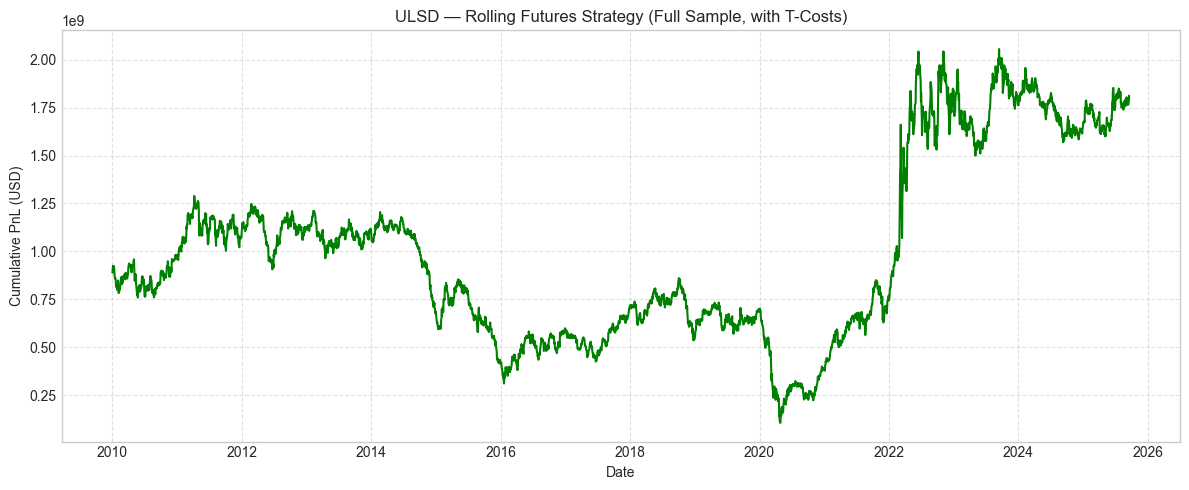

----- ULSD — Rolling Futures Metrics (Full Sample, USD) -----


Total PnL       Total Cost  APL/unit  Std Dev (ann.)  Sharpe  \
0 905,604,000.0000 -79,380,000.0000   13.7158         78.1528  0.1755   

   Drawdown    RoD   Years  
0   -1.4451 9.4913 15.7205

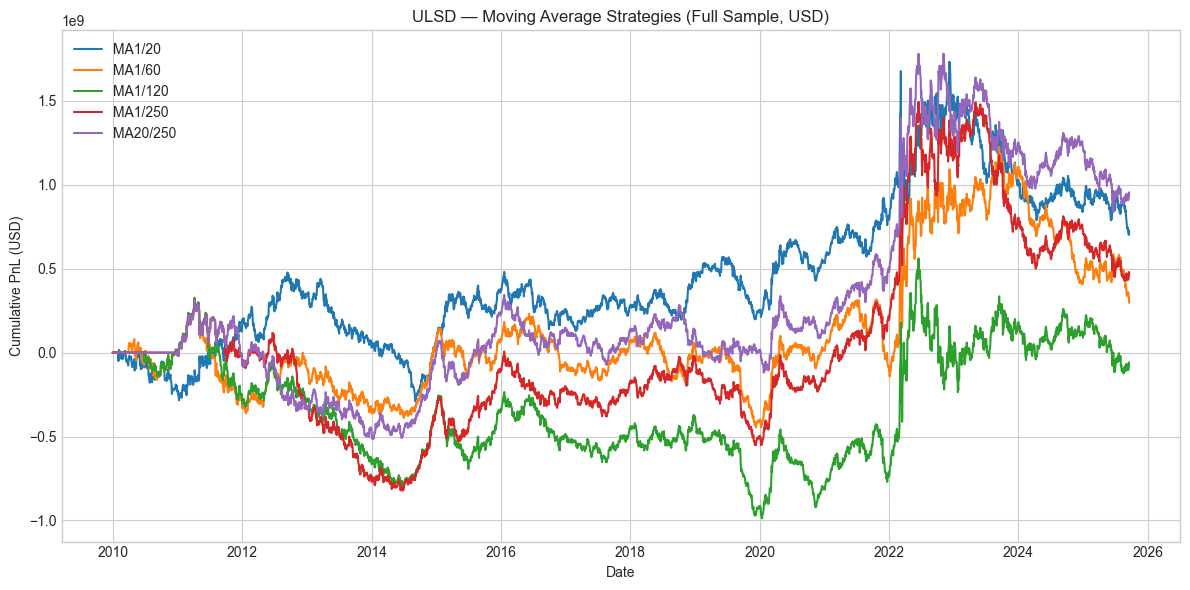

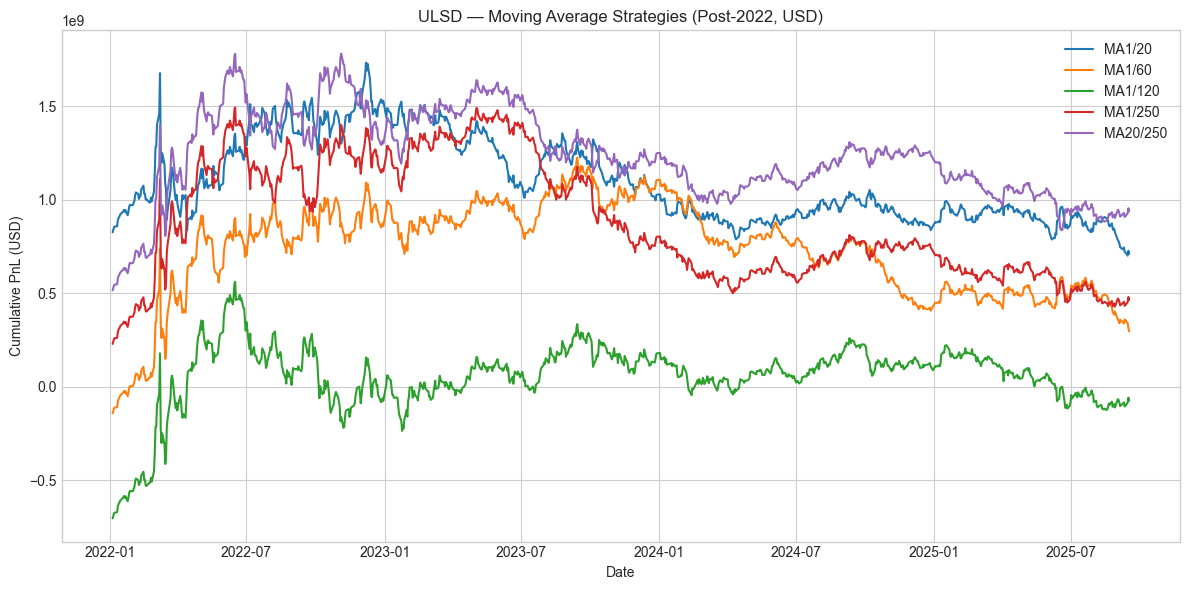

----- ULSD — MA Strategy Metrics (Full / Pre / Post, USD) -----

MA1/20


Total PnL       Total Cost  APL/unit  Std Dev (ann.)  \
Full Sample 0 710,640,000.0000 280,140,000.0000   10.7630         78.2593   
Pre-2022    0 803,922,000.0000 204,750,000.0000   15.9326         56.3048   
Post-2022   0 -93,282,000.0000  75,390,000.0000   -5.9960        125.4966   

               Sharpe  Drawdown     RoD   Years  
Full Sample 0  0.1375   -0.8543 12.5993 15.7205  
Pre-2022    0  0.2830   -0.8543 18.6510 12.0137  
Post-2022   0 -0.0478   -0.7649 -7.8395  3.7041


MA1/60


Total PnL       Total Cost  APL/unit  Std Dev (ann.)  \
Full Sample 0  296,226,000.0000 191,520,000.0000    4.4865         77.9614   
Pre-2022    0 -119,616,000.0000 143,850,000.0000   -2.3706         55.8284   
Post-2022   0  415,842,000.0000  47,670,000.0000   26.7298        125.3957   

               Sharpe  Drawdown     RoD   Years  
Full Sample 0  0.0575   -1.0355  4.3327 15.7205  
Pre-2022    0 -0.0425   -1.0355 -2.2894 12.0137  
Post-2022   0  0.2132   -0.5263 50.7835  3.7041


MA1/120


Total PnL       Total Cost  APL/unit  Std Dev (ann.)  \
Full Sample 0  -74,844,000.0000 154,770,000.0000   -1.1335         77.5870   
Pre-2022    0 -725,046,000.0000 120,960,000.0000  -14.3694         55.1567   
Post-2022   0  650,202,000.0000  33,810,000.0000   41.7941        125.3470   

               Sharpe  Drawdown     RoD   Years  
Full Sample 0 -0.0146   -1.7599 -0.6441 15.7205  
Pre-2022    0 -0.2605   -1.7599 -8.1648 12.0137  
Post-2022   0  0.3334   -0.4668 89.5380  3.7041


MA1/250


Total PnL       Total Cost  APL/unit  Std Dev (ann.)  \
Full Sample 0 463,344,000.0000 128,100,000.0000    7.0176         76.9402   
Pre-2022    0 207,102,000.0000  94,710,000.0000    4.1045         53.9691   
Post-2022   0 256,242,000.0000  33,390,000.0000   16.4709        125.3695   

               Sharpe  Drawdown     RoD   Years  
Full Sample 0  0.0912   -1.5490  4.5305 15.7205  
Pre-2022    0  0.0761   -1.5490  2.6498 12.0137  
Post-2022   0  0.1314   -0.6244 26.3790  3.7041


MA20/250


Total PnL      Total Cost  APL/unit  Std Dev (ann.)  \
Full Sample 0 937,944,000.0000 85,680,000.0000   14.2056         76.8872   
Pre-2022    0 493,710,000.0000 64,050,000.0000    9.7847         53.9136   
Post-2022   0 444,234,000.0000 21,630,000.0000   28.5548        125.3064   

               Sharpe  Drawdown     RoD   Years  
Full Sample 0  0.1848   -1.1322 12.5473 15.7205  
Pre-2022    0  0.1815   -1.1322  8.6425 12.0137  
Post-2022   0  0.2279   -0.5531 51.6273  3.7041

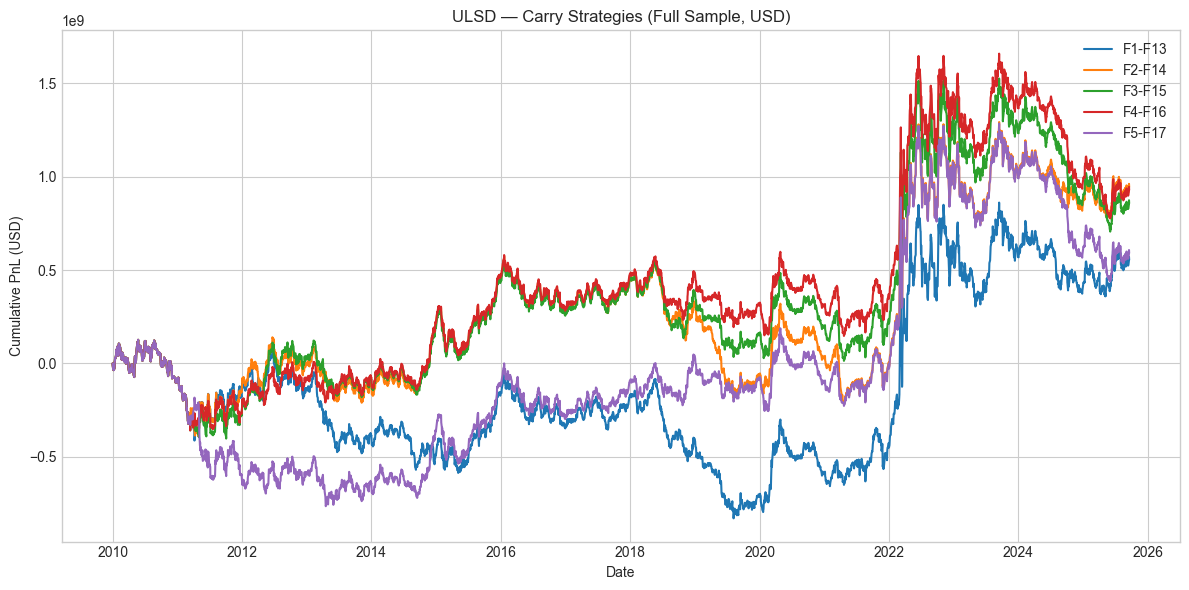

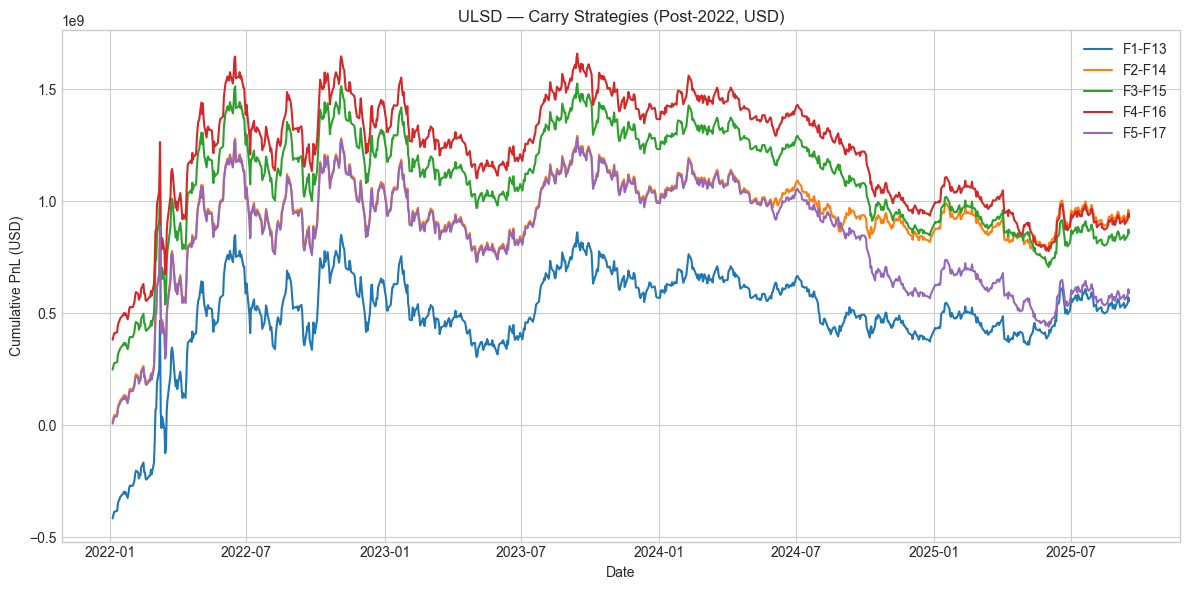

----- ULSD — Carry Strategy Metrics (Full / Pre / Post, USD) -----

F1-F13


Total PnL       Total Cost  APL/unit  Std Dev (ann.)  \
Full Sample 0  554,316,000.0000 132,720,000.0000    8.3954         78.1856   
Pre-2022    0 -437,346,000.0000 109,830,000.0000   -8.6676         56.2867   
Post-2022   0  991,662,000.0000  22,890,000.0000   63.7427        125.2695   

               Sharpe  Drawdown      RoD   Years  
Full Sample 0  0.1074   -1.7482   4.8022 15.7205  
Pre-2022    0 -0.1540   -1.7482  -4.9579 12.0137  
Post-2022   0  0.5088   -0.4466 142.7418  3.7041


F2-F14


Total PnL       Total Cost  APL/unit  Std Dev (ann.)  \
Full Sample 0 944,874,000.0000 122,640,000.0000   14.3106         78.1778   
Pre-2022    0  -6,216,000.0000  98,490,000.0000   -0.1232         56.2806   
Post-2022   0 951,090,000.0000  24,150,000.0000   61.1348        125.2759   

               Sharpe  Drawdown      RoD   Years  
Full Sample 0  0.1831   -0.9427  15.1809 15.7205  
Pre-2022    0 -0.0022   -0.9427  -0.1307 12.0137  
Post-2022   0  0.4880   -0.4466 136.9018  3.7041


F3-F15


Total PnL       Total Cost  APL/unit  Std Dev (ann.)  \
Full Sample 0 857,052,000.0000 117,180,000.0000   12.9805         78.1344   
Pre-2022    0 226,506,000.0000  90,090,000.0000    4.4890         56.1930   
Post-2022   0 630,546,000.0000  27,090,000.0000   40.5307        125.3182   

               Sharpe  Drawdown     RoD   Years  
Full Sample 0  0.1661   -0.9669 13.4251 15.7205  
Pre-2022    0  0.0799   -0.9669  4.6428 12.0137  
Post-2022   0  0.3234   -0.4767 85.0306  3.7041


F4-F16


Total PnL       Total Cost  APL/unit  Std Dev (ann.)  \
Full Sample 0 928,452,000.0000 112,980,000.0000   14.0619         78.1740   
Pre-2022    0 359,814,000.0000  85,890,000.0000    7.1310         56.2659   
Post-2022   0 568,638,000.0000  27,090,000.0000   36.5513        125.3221   

               Sharpe  Drawdown     RoD   Years  
Full Sample 0  0.1799   -0.8871 15.8514 15.7205  
Pre-2022    0  0.1267   -0.8871  8.0385 12.0137  
Post-2022   0  0.2917   -0.5127 71.2939  3.7041


F5-F17


Total PnL       Total Cost  APL/unit  Std Dev (ann.)  \
Full Sample 0 590,688,000.0000 112,140,000.0000    8.9463         78.1548   
Pre-2022    0 -14,658,000.0000  85,470,000.0000   -0.2905         56.2283   
Post-2022   0 605,346,000.0000  26,670,000.0000   38.9108        125.3179   

               Sharpe  Drawdown     RoD   Years  
Full Sample 0  0.1145   -1.6290  5.4918 15.7205  
Pre-2022    0 -0.0052   -1.6290 -0.1783 12.0137  
Post-2022   0  0.3105   -0.4913 79.1959  3.7041

===== Completed ULSD (HO) =====


=== RBOB (XB) | t_cost=0.05 ===
Found sheet 'RBOB (XB)' for XB


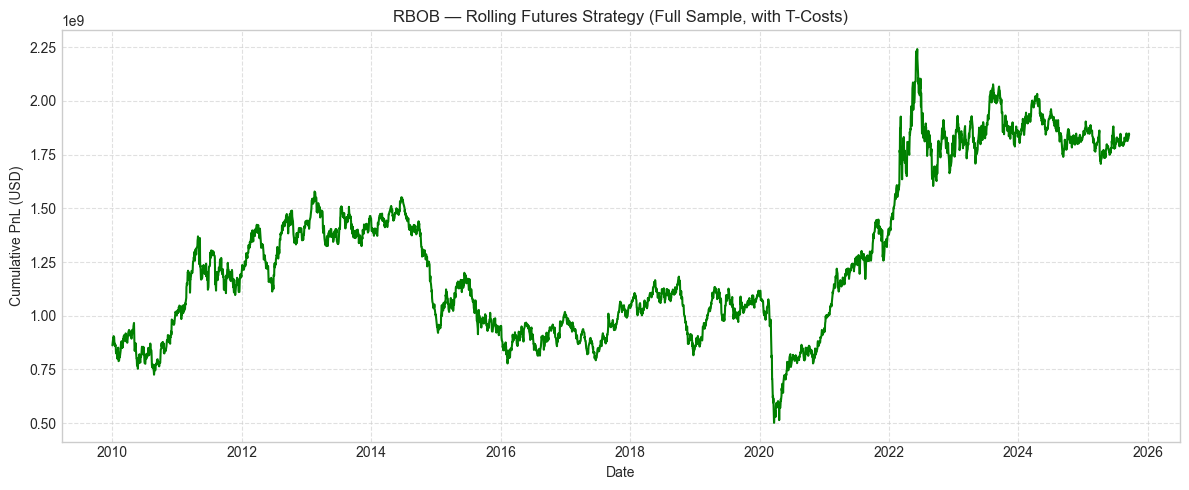

----- RBOB — Rolling Futures Metrics (Full Sample, USD) -----


Total PnL       Total Cost  APL/unit  Std Dev (ann.)  Sharpe  \
0 980,448,000.0000 -79,380,000.0000   14.8494         70.8236  0.2097   

   Drawdown     RoD   Years  
0   -0.9481 15.6629 15.7205

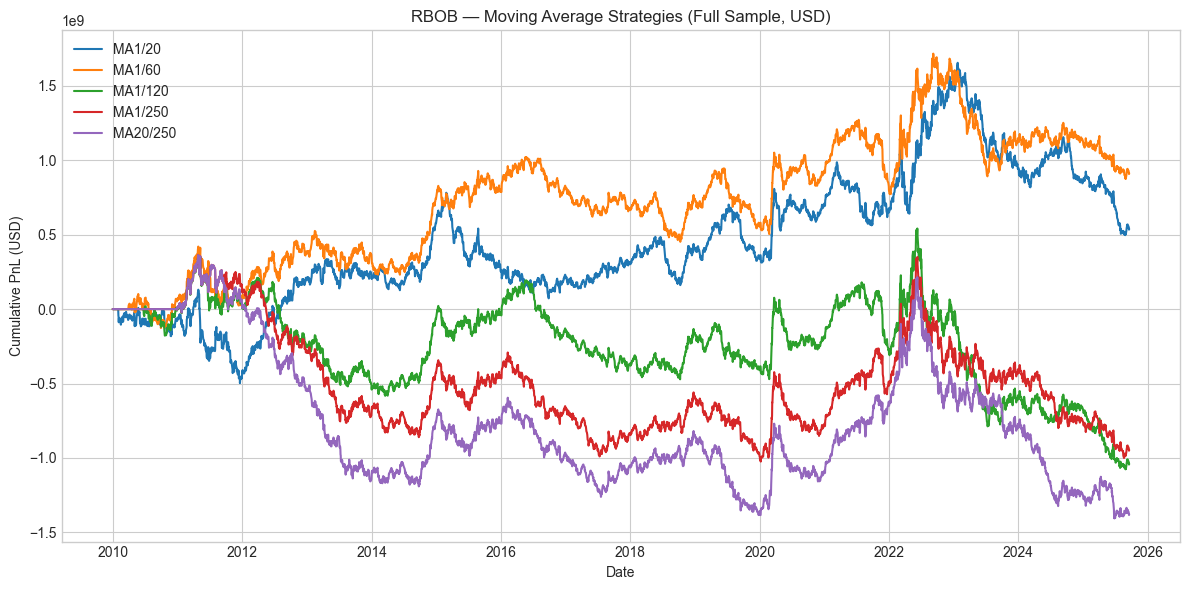

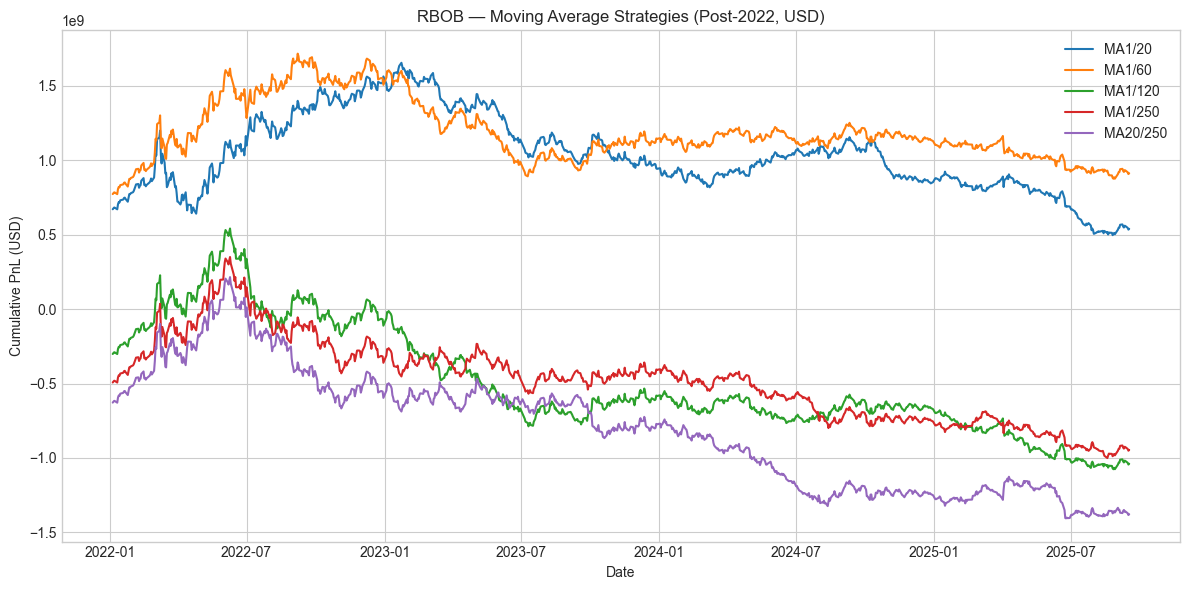

----- RBOB — MA Strategy Metrics (Full / Pre / Post, USD) -----

MA1/20


Total PnL       Total Cost  APL/unit  Std Dev (ann.)  \
Full Sample 0  538,944,000.0000 266,700,000.0000    8.1626         70.9433   
Pre-2022    0  662,088,000.0000 198,870,000.0000   13.1217         62.1782   
Post-2022   0 -123,144,000.0000  67,830,000.0000   -7.9155         94.0022   

               Sharpe  Drawdown     RoD   Years  
Full Sample 0  0.1151   -1.1405  7.1567 15.7205  
Pre-2022    0  0.2110   -1.1405 11.5048 12.0137  
Post-2022   0 -0.0842   -0.8197 -9.6566  3.7041


MA1/60


Total PnL       Total Cost  APL/unit  Std Dev (ann.)  \
Full Sample 0 912,198,000.0000 175,560,000.0000   13.8157         70.5737   
Pre-2022    0 781,074,000.0000 132,510,000.0000   15.4798         61.6741   
Post-2022   0 131,124,000.0000  43,050,000.0000    8.4285         93.9056   

               Sharpe  Drawdown     RoD   Years  
Full Sample 0  0.1958   -0.4714 29.3054 15.7205  
Pre-2022    0  0.2510   -0.4714 32.8353 12.0137  
Post-2022   0  0.0898   -0.6201 13.5920  3.7041


MA1/120


Total PnL       Total Cost  APL/unit  Std Dev (ann.)  \
Full Sample 0 -1,038,702,000.0000 161,910,000.0000  -15.7316         70.1358   
Pre-2022    0   -309,750,000.0000 114,240,000.0000   -6.1388         61.0181   
Post-2022   0   -728,952,000.0000  47,670,000.0000  -46.8561         93.8780   

               Sharpe  Drawdown      RoD   Years  
Full Sample 0 -0.2243   -1.6819  -9.3534 15.7205  
Pre-2022    0 -0.1006   -1.2087  -5.0791 12.0137  
Post-2022   0 -0.4991   -1.2719 -36.8381  3.7041


MA1/250


Total PnL       Total Cost  APL/unit  Std Dev (ann.)  \
Full Sample 0 -945,672,000.0000 139,020,000.0000  -14.3227         69.3942   
Pre-2022    0 -501,144,000.0000 102,270,000.0000   -9.9320         59.9139   
Post-2022   0 -444,528,000.0000  36,750,000.0000  -28.5737         93.8690   

               Sharpe  Drawdown      RoD   Years  
Full Sample 0 -0.2064   -1.7719  -8.0832 15.7205  
Pre-2022    0 -0.1658   -1.7719  -5.6052 12.0137  
Post-2022   0 -0.3044   -1.0623 -26.8979  3.7041


MA20/250


Total PnL      Total Cost  APL/unit  Std Dev (ann.)  \
Full Sample 0 -1,377,516,000.0000 89,460,000.0000  -20.8631         69.3234   
Pre-2022    0   -636,300,000.0000 66,990,000.0000  -12.6106         59.8415   
Post-2022   0   -741,216,000.0000 22,470,000.0000  -47.6444         93.7822   

               Sharpe  Drawdown      RoD   Years  
Full Sample 0 -0.3010   -2.2593  -9.2344 15.7205  
Pre-2022    0 -0.2107   -2.2315  -5.6511 12.0137  
Post-2022   0 -0.5080   -1.2746 -37.3792  3.7041

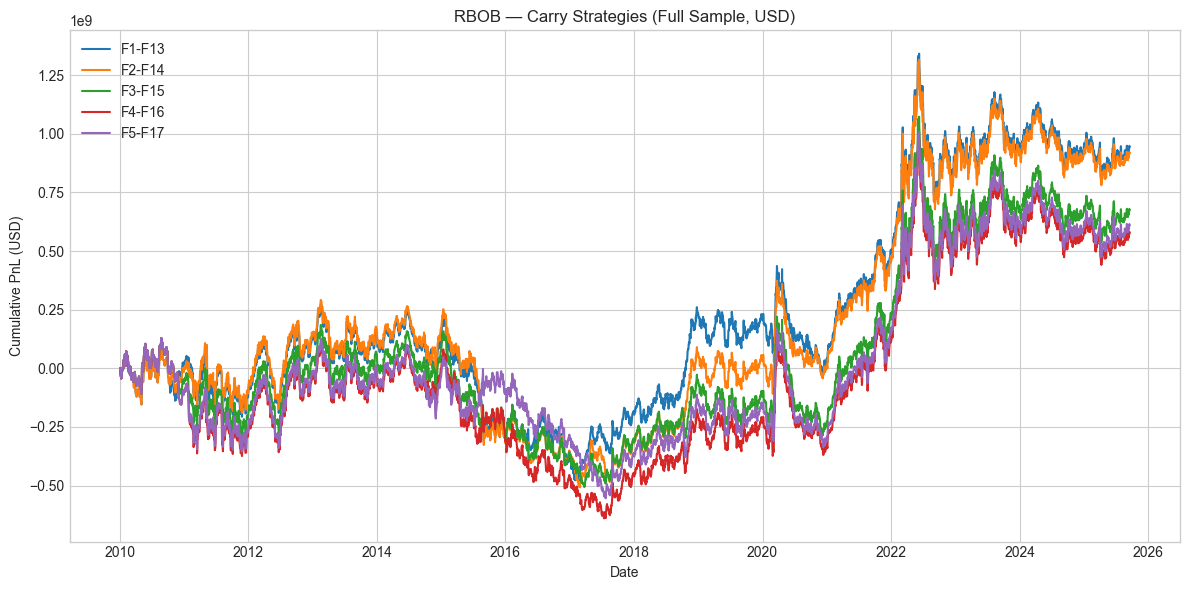

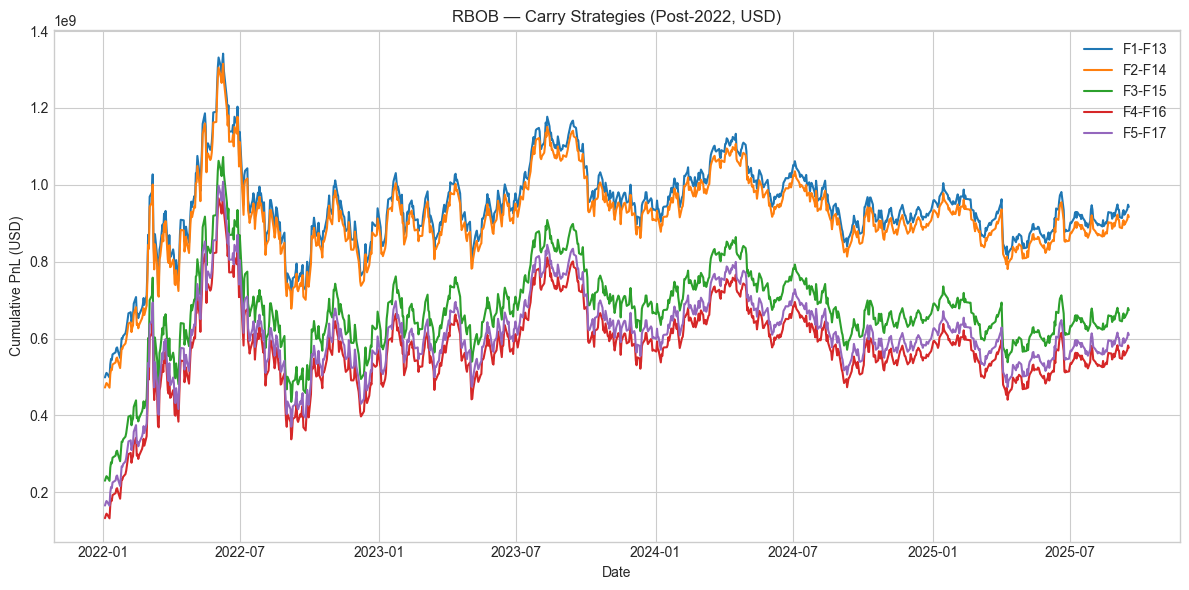

----- RBOB — Carry Strategy Metrics (Full / Pre / Post, USD) -----

F1-F13


Total PnL       Total Cost  APL/unit  Std Dev (ann.)  \
Full Sample 0 942,648,000.0000 106,680,000.0000   14.2769         70.8431   
Pre-2022    0 490,476,000.0000  87,990,000.0000    9.7206         62.1146   
Post-2022   0 452,172,000.0000  18,690,000.0000   29.0650         93.8184   

               Sharpe  Drawdown     RoD   Years  
Full Sample 0  0.2015   -1.0825 13.1887 15.7205  
Pre-2022    0  0.1565   -1.0825  8.9797 12.0137  
Post-2022   0  0.3098   -0.5015 57.9614  3.7041


F2-F14


Total PnL       Total Cost  APL/unit  Std Dev (ann.)  \
Full Sample 0 916,272,000.0000 106,680,000.0000   13.8774         70.8445   
Pre-2022    0 464,100,000.0000  87,990,000.0000    9.1978         62.1166   
Post-2022   0 452,172,000.0000  18,690,000.0000   29.0650         93.8184   

               Sharpe  Drawdown     RoD   Years  
Full Sample 0  0.1959   -1.1224 12.3638 15.7205  
Pre-2022    0  0.1481   -1.1224  8.1947 12.0137  
Post-2022   0  0.3098   -0.5015 57.9614  3.7041


F3-F15


Total PnL       Total Cost  APL/unit  Std Dev (ann.)  \
Full Sample 0 673,848,000.0000 105,420,000.0000   10.2058         70.8502   
Pre-2022    0 221,676,000.0000  86,730,000.0000    4.3933         62.1235   
Post-2022   0 452,172,000.0000  18,690,000.0000   29.0650         93.8184   

               Sharpe  Drawdown     RoD   Years  
Full Sample 0  0.1440   -1.1425  8.9331 15.7205  
Pre-2022    0  0.0707   -1.1425  3.8455 12.0137  
Post-2022   0  0.3098   -0.5015 57.9614  3.7041


F4-F16


Total PnL       Total Cost  APL/unit  Std Dev (ann.)  \
Full Sample 0 576,324,000.0000 102,900,000.0000    8.7287         70.8475   
Pre-2022    0 124,152,000.0000  84,210,000.0000    2.4605         62.1187   
Post-2022   0 452,172,000.0000  18,690,000.0000   29.0650         93.8184   

               Sharpe  Drawdown     RoD   Years  
Full Sample 0  0.1232   -1.3995  6.2370 15.7205  
Pre-2022    0  0.0396   -1.3995  1.7581 12.0137  
Post-2022   0  0.3098   -0.5015 57.9614  3.7041


F5-F17


Total PnL       Total Cost  APL/unit  Std Dev (ann.)  \
Full Sample 0 609,294,000.0000 102,480,000.0000    9.2280         70.8399   
Pre-2022    0 157,122,000.0000  83,790,000.0000    3.1139         62.1076   
Post-2022   0 452,172,000.0000  18,690,000.0000   29.0650         93.8184   

               Sharpe  Drawdown     RoD   Years  
Full Sample 0  0.1303   -1.2442  7.4170 15.7205  
Pre-2022    0  0.0501   -1.2442  2.5028 12.0137  
Post-2022   0  0.3098   -0.5015 57.9614  3.7041

===== Completed RBOB (XB) =====


=== Gasoil (QS) | t_cost=0.5 ===
Found sheet 'Gasoil (QS)' for QS


In [3]:
# ---------------------------------------------------------------------
# MAIN LOOP
# ---------------------------------------------------------------------
for commodity_name, (ticker, contracts, units, t_cost) in COMMODITIES.items():
    print("=" * 80)
    print(f"=== {commodity_name} ({ticker}) | t_cost={t_cost} ===")
    print("=" * 80)

    # 1) load ---------------------------------------------------------
    try:
        raw_df = read_data(data_path, sheet=ticker)
    except ValueError:
        xls = pd.ExcelFile(data_path)
        match = [s for s in xls.sheet_names if ticker in s or ticker.strip() in s]
        if not match:
            raise ValueError(
                f"No worksheet found for {ticker} in {data_path}. "
                f"Sheets found: {xls.sheet_names}"
            )
        sheet_name = match[0]
        print(f"Found sheet '{sheet_name}' for {ticker}")
        raw_df = read_data(data_path, sheet=sheet_name)

    # --- clean: YOUR version (keep FIRST in each dupe block) --------
    clean_df = drop_dupes(raw_df).sort_index()
    CLEAN_DATA[ticker] = clean_df
    prices_df = CLEAN_DATA[ticker]

    expiry = expiry_calendar(ticker, calendar_path=calendar_path)

    # 2) per-commodity setup ------------------------------------------
    if commodity_name.lower() == "propane":
        front_col = "F3"
        next_col  = "F4"
        this_roll_window = roll_window    # your sheet
    else:
        front_col = "F1"
        next_col  = "F2"
        this_roll_window = roll_window

    # 3) base roll ----------------------------------------------------
    roll = RollingStrategy(
        prices_df,
        expiry,
        front_col=front_col,
        next_col=next_col,
    )

    rolled_raw = roll.pnl(roll_window=this_roll_window)
    rolled_df  = roll.equity(
        roll_window=this_roll_window,
        t_cost=t_cost,
        style="window",
    )

    # scale for charts
    scale = contracts * units
    rolled_df["equity_dollar"]  = rolled_df["equity_line"] * scale
    rolled_df["net_pnl_dollar"] = rolled_df["net_pnl"] * scale

    # -----------------------------------------------------------------
    # PROPANE: export EXACT series (no rebasing)
    # -----------------------------------------------------------------
    if commodity_name.lower() == "propane":
        dbg = rolled_df.copy()

        roll_col = "roll_day_flag" if "roll_day_flag" in dbg.columns else "roll_window_flag"

        export_df = pd.DataFrame(index=dbg.index)
        export_df["Transaction Costs"]   = dbg["t_cost"]
        export_df["Rolling Futures"]     = dbg["daily_pnl"]
        export_df["Long P&L"]            = dbg["net_pnl"]
        export_df["Equity (seeded)"]     = dbg["equity_line"]
        export_df["Equity (seeded, $)"]  = dbg["equity_dollar"]
        export_df["Held contract"]       = dbg.get("held_contract", np.nan)
        export_df["T-5 Roll"]            = dbg[roll_col].astype(int)

        export_df.to_excel("propane_t5_debug_LIBRARY.xlsx")
        print("[DEBUG] wrote propane_t5_debug_LIBRARY.xlsx")

        plt.figure(figsize=(12, 5))
        plt.plot(dbg.index, dbg["equity_dollar"],
                 label="Propane roll (seeded)", linewidth=1.5)
        plt.title("Propane — Rolling Futures Strategy (F2→F3, window=6)")
        plt.xlabel("Date")
        plt.ylabel("Cumulative PnL (USD)")
        plt.grid(True, linestyle="--", alpha=0.6)
        plt.legend()
        plt.tight_layout()
        plt.show()

    else:
        plt.figure(figsize=(12, 5))
        plt.plot(rolled_df.index, rolled_df["equity_dollar"],
                 color="green", linewidth=1.5)
        plt.title(f"{commodity_name} — Rolling Futures Strategy (Full Sample, with T-Costs)")
        plt.xlabel("Date")
        plt.ylabel("Cumulative PnL (USD)")
        plt.grid(True, linestyle="--", alpha=0.6)
        plt.tight_layout()
        plt.show()

    # metrics ---------------------------------------------------------
    print(f"----- {commodity_name} — Rolling Futures Metrics (Full Sample, USD) -----")
    m_full = roll.metrics(contracts=contracts, units=units)
    display(m_full.to_frame().T)

    # ... MA / carry below unchanged ...



    # -----------------------------------------------------------------
    # 8. MOVING AVERAGE STRATEGIES
    # -----------------------------------------------------------------
    ma_params = [(1, 20), (1, 60), (1, 120), (1, 250), (20, 250)]
    ma_results = {}

    plt.figure(figsize=(12, 6))
    for short_ma, long_ma in ma_params:
        df_ma = momentum(
            prices=prices_df,
            rolled_df=rolled_raw,   # raw roll is the input to momentum
            front_col="F1",
            short_ma=short_ma,
            long_ma=long_ma,
            t_cost=t_cost,
            epsilon=0.00,
        )

        # scale to dollars for charts
        df_ma["equity_dollar"] = df_ma["equity_line"] * scale
        df_ma["net_pnl_dollar"] = df_ma["net_pnl"] * scale

        name = f"MA{short_ma}/{long_ma}"
        ma_results[name] = df_ma
        plt.plot(df_ma.index, df_ma["equity_dollar"], label=name)

    plt.title(f"{commodity_name} — Moving Average Strategies (Full Sample, USD)")
    plt.xlabel("Date")
    plt.ylabel("Cumulative PnL (USD)")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # post-2022 MA view
    plt.figure(figsize=(12, 6))
    for name, df in ma_results.items():
        df_post = df.loc[df.index >= cutoff]
        plt.plot(df_post.index, df_post["equity_dollar"], label=name)
    plt.title(f"{commodity_name} — Moving Average Strategies (Post-2022, USD)")
    plt.xlabel("Date")
    plt.ylabel("Cumulative PnL (USD)")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # MA metrics
    print(f"----- {commodity_name} — MA Strategy Metrics (Full / Pre / Post, USD) -----")
    for name, df in ma_results.items():
        df_pre  = df.loc[df.index < cutoff]
        df_post = df.loc[df.index >= cutoff]

        m_full = metrics(df, contracts=contracts, units=units)
        m_pre  = metrics(df_pre, contracts=contracts, units=units)
        m_post = metrics(df_post, contracts=contracts, units=units)

        box = pd.concat(
            [m_full.to_frame().T, m_pre.to_frame().T, m_post.to_frame().T],
            keys=["Full Sample", "Pre-2022", "Post-2022"],
        )
        print(f"\n{name}")
        display(box)

    all_ma_results[commodity_name] = ma_results

    # -----------------------------------------------------------------
    # 9. CARRY STRATEGIES
    # -----------------------------------------------------------------
    carry_pairs = [(1, 13), (2, 14), (3, 15), (4, 16), (5, 17)]
    carry_results = {}

    plt.figure(figsize=(12, 6))
    for f1, f2 in carry_pairs:
        df_carry = carry(
            prices=prices_df,
            rolled_df=rolled_raw,
            front_col=f"F{f1}",
            end_col=f"F{f2}",
            t_cost=t_cost,
            epsilon=0.00,
        )

        # scale to dollars
        df_carry["equity_dollar"] = df_carry["equity_line"] * scale
        df_carry["net_pnl_dollar"] = df_carry["net_pnl"] * scale

        name = f"F{f1}-F{f2}"
        carry_results[name] = df_carry
        plt.plot(df_carry.index, df_carry["equity_dollar"], label=name)

    plt.title(f"{commodity_name} — Carry Strategies (Full Sample, USD)")
    plt.xlabel("Date")
    plt.ylabel("Cumulative PnL (USD)")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # post-2022 carry view
    plt.figure(figsize=(12, 6))
    for name, df in carry_results.items():
        df_post = df.loc[df.index >= cutoff]
        plt.plot(df_post.index, df_post["equity_dollar"], label=name)
    plt.title(f"{commodity_name} — Carry Strategies (Post-2022, USD)")
    plt.xlabel("Date")
    plt.ylabel("Cumulative PnL (USD)")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # carry metrics
    print(f"----- {commodity_name} — Carry Strategy Metrics (Full / Pre / Post, USD) -----")
    for name, df in carry_results.items():
        df_pre  = df.loc[df.index < cutoff]
        df_post = df.loc[df.index >= cutoff]

        m_full = metrics(df, contracts=contracts, units=units)
        m_pre  = metrics(df_pre, contracts=contracts, units=units)
        m_post = metrics(df_post, contracts=contracts, units=units)

        box = pd.concat(
            [m_full.to_frame().T, m_pre.to_frame().T, m_post.to_frame().T],
            keys=["Full Sample", "Pre-2022", "Post-2022"],
        )
        print(f"\n{name}")
        display(box)

    all_carry_results[commodity_name] = carry_results

    print(f"===== Completed {commodity_name} ({ticker}) =====\n\n")


=== MOMENTUM PORTFOLIO — MA1/20 ===


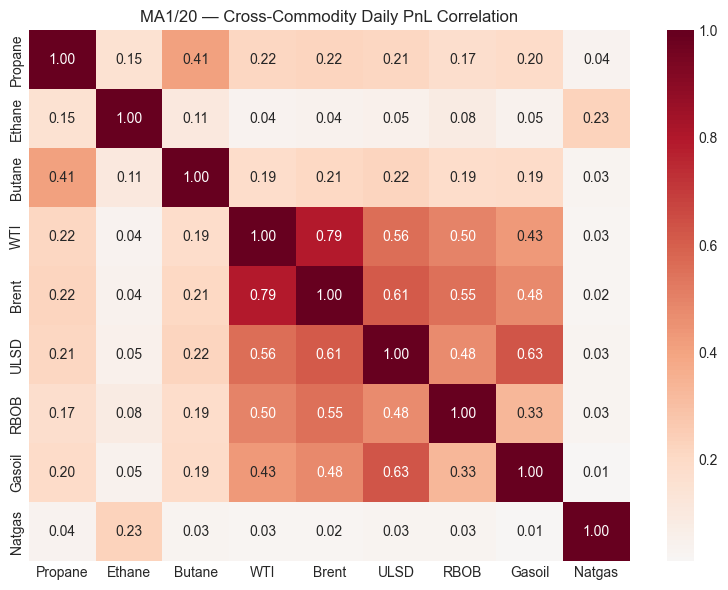

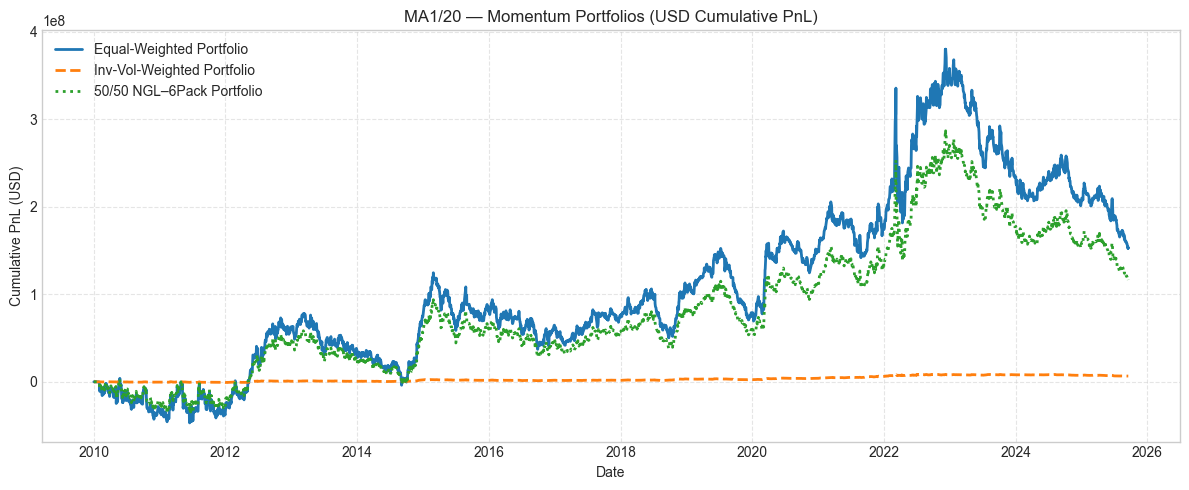

----- MA1/20 Portfolio Metrics (Equal) -----


Total PnL  Total Cost       APL/unit  Std Dev (ann.)  Sharpe  \
0 152,729,598.8889      0.0000 9,715,284.6975 60,433,730.0204  0.1608   

       Drawdown     RoD   Years  
0 -247,801.9911 39.2058 15.7205

----- MA1/20 Portfolio Metrics (InvVol) -----


Total PnL  Total Cost     APL/unit  Std Dev (ann.)  Sharpe  Drawdown  \
0 6,555,803.4658      0.0000 417,021.3079    965,711.8364  0.4318 -843.7452   

       RoD   Years  
0 494.2503 15.7205

----- MA1/20 Portfolio Metrics (Split50_50) -----


Total PnL  Total Cost       APL/unit  Std Dev (ann.)  Sharpe  \
0 116,399,731.6667      0.0000 7,404,304.9945 45,374,547.8055  0.1632   

       Drawdown     RoD   Years  
0 -186,450.9033 39.7118 15.7205

=== MOMENTUM PORTFOLIO — MA1/60 ===


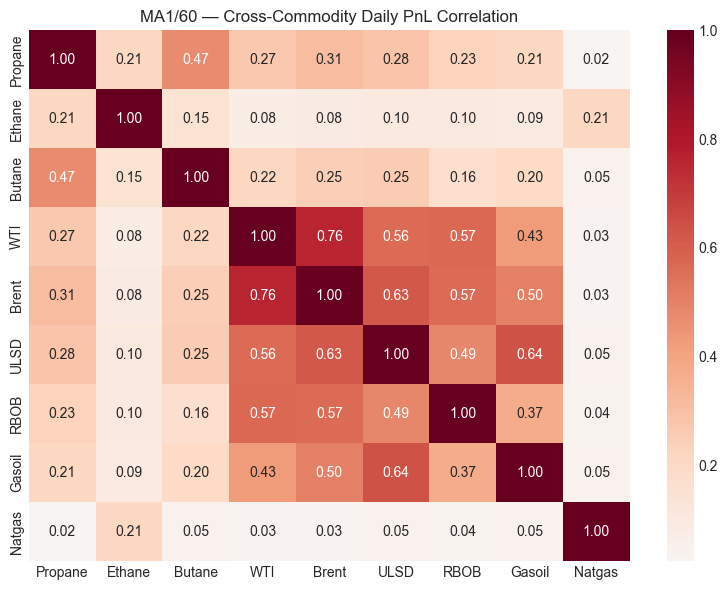

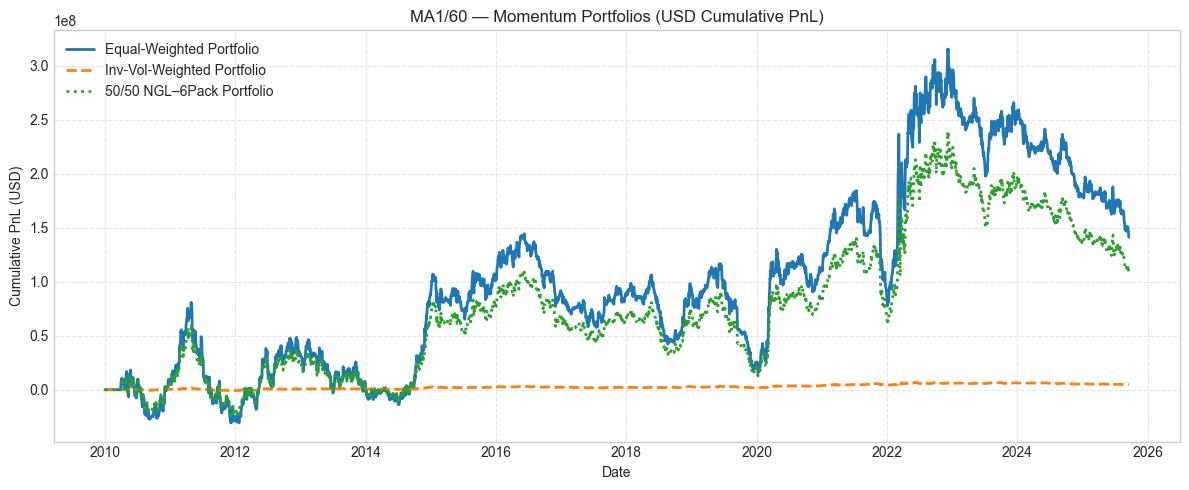

----- MA1/60 Portfolio Metrics (Equal) -----


Total PnL  Total Cost       APL/unit  Std Dev (ann.)  Sharpe  \
0 141,133,798.0000      0.0000 8,977,664.0415 60,464,538.2031  0.1485   

   Drawdown         RoD   Years  
0 -146.7778 61,165.0086 15.7205

----- MA1/60 Portfolio Metrics (InvVol) -----


Total PnL  Total Cost     APL/unit  Std Dev (ann.)  Sharpe  Drawdown  \
0 4,751,015.8411      0.0000 302,216.9366    986,012.3934  0.3065  -61.0004   

         RoD   Years  
0 4,954.3474 15.7205

----- MA1/60 Portfolio Metrics (Split50_50) -----


Total PnL  Total Cost       APL/unit  Std Dev (ann.)  Sharpe  \
0 108,246,697.0000      0.0000 6,885,682.1898 45,406,141.1746  0.1516   

   Drawdown         RoD   Years  
0 -120.5833 57,103.1004 15.7205

=== MOMENTUM PORTFOLIO — MA1/120 ===


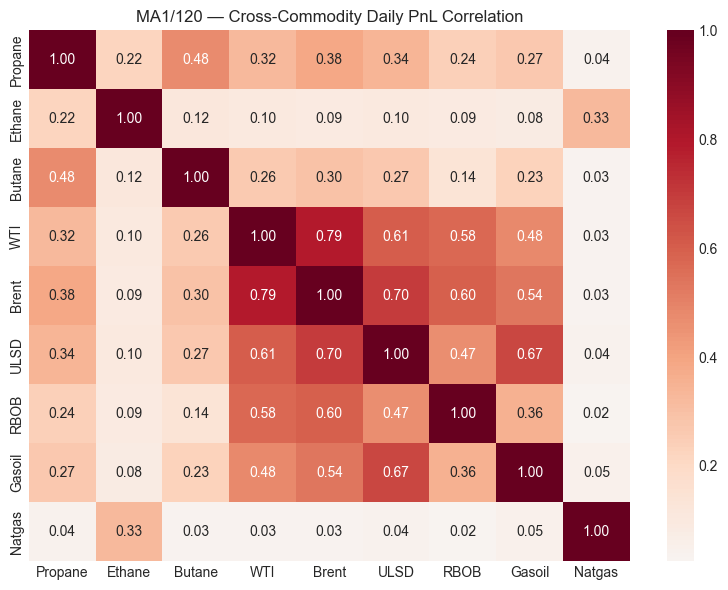

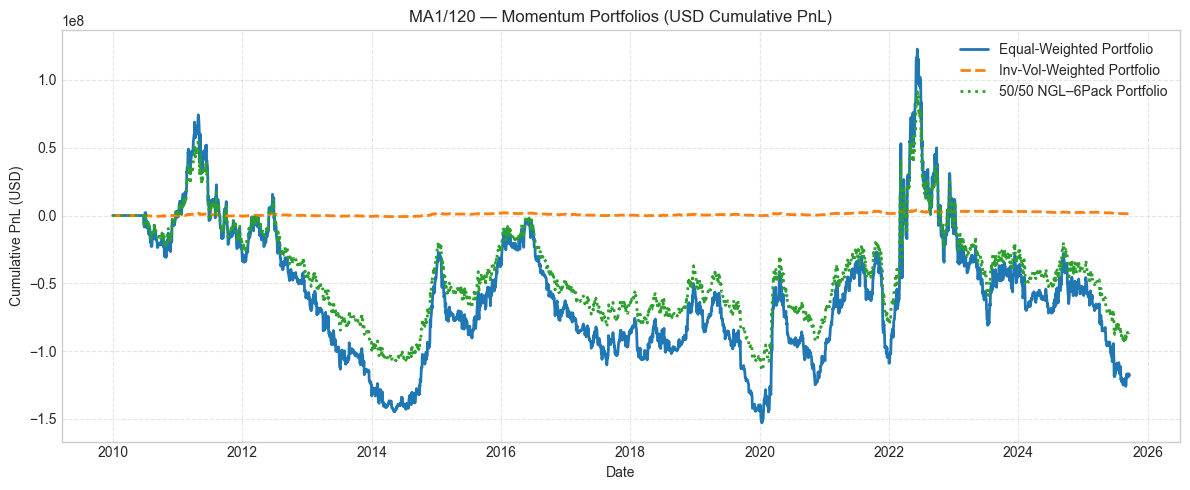

----- MA1/120 Portfolio Metrics (Equal) -----


Total PnL  Total Cost        APL/unit  Std Dev (ann.)  Sharpe  \
0 -118,093,780.4444      0.0000 -7,512,065.1555 59,775,641.3830 -0.1257   

     Drawdown         RoD   Years  
0 -3,351.9825 -2,241.0812 15.7205

----- MA1/120 Portfolio Metrics (InvVol) -----


Total PnL  Total Cost    APL/unit  Std Dev (ann.)  Sharpe  Drawdown  \
0 1,262,739.5808      0.0000 80,324.1455  1,001,240.5903  0.0802  -86.5110   

       RoD   Years  
0 928.4843 15.7205

----- MA1/120 Portfolio Metrics (Split50_50) -----


Total PnL  Total Cost        APL/unit  Std Dev (ann.)  Sharpe  \
0 -87,153,962.3333      0.0000 -5,543,951.9435 44,892,393.4144 -0.1235   

     Drawdown         RoD   Years  
0 -3,306.7371 -1,676.5627 15.7205

=== MOMENTUM PORTFOLIO — MA1/250 ===


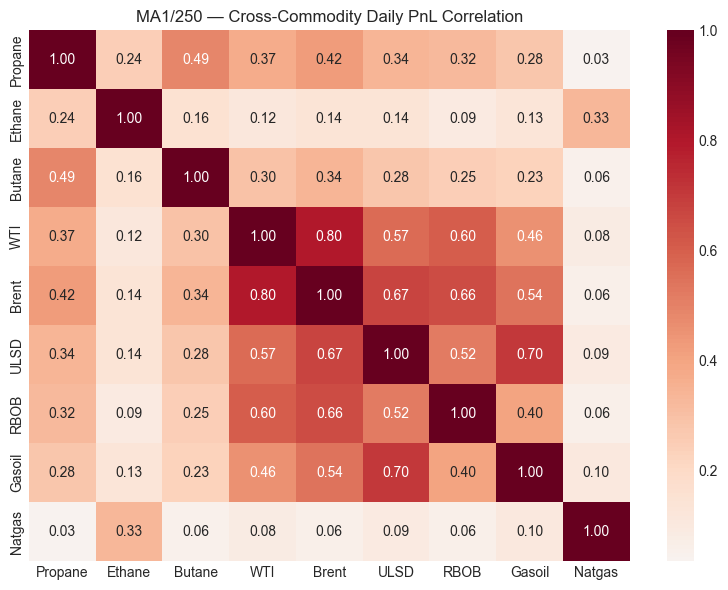

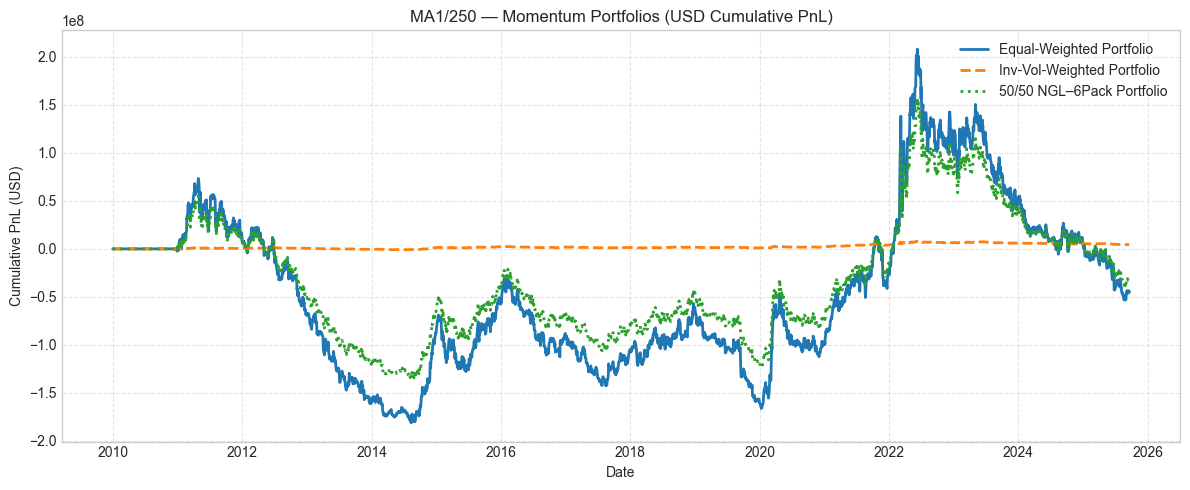

----- MA1/250 Portfolio Metrics (Equal) -----


Total PnL  Total Cost        APL/unit  Std Dev (ann.)  Sharpe  \
0 -44,976,454.4444      0.0000 -2,860,997.8864 60,274,409.9755 -0.0475   

   Drawdown          RoD   Years  
0  -49.6381 -57,637.1930 15.7205

----- MA1/250 Portfolio Metrics (InvVol) -----


Total PnL  Total Cost     APL/unit  Std Dev (ann.)  Sharpe  Drawdown  \
0 4,448,568.4733      0.0000 282,977.9527  1,017,497.7792  0.2781   -4.6810   

          RoD   Years  
0 60,452.6266 15.7205

----- MA1/250 Portfolio Metrics (Split50_50) -----


Total PnL  Total Cost        APL/unit  Std Dev (ann.)  Sharpe  \
0 -31,933,848.3333      0.0000 -2,031,344.4827 45,275,663.8021 -0.0449   

   Drawdown          RoD   Years  
0  -50.1549 -40,501.3765 15.7205

=== MOMENTUM PORTFOLIO — MA20/250 ===


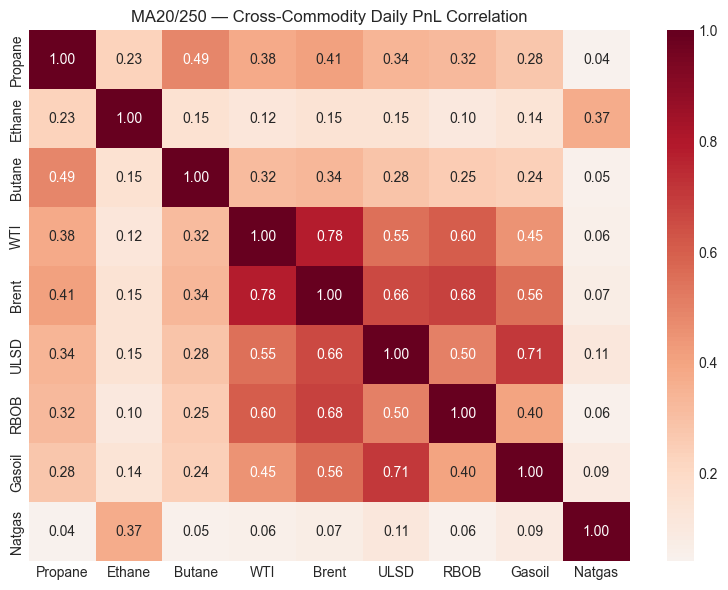

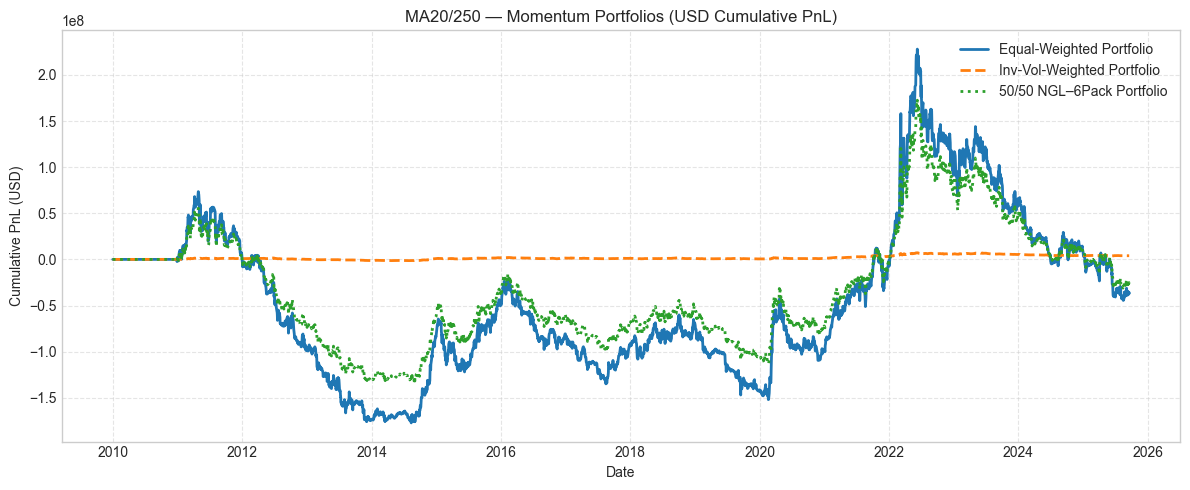

----- MA20/250 Portfolio Metrics (Equal) -----


Total PnL  Total Cost        APL/unit  Std Dev (ann.)  Sharpe  \
0 -36,892,889.5556      0.0000 -2,346,794.1247 59,791,806.9453 -0.0392   

   Drawdown          RoD   Years  
0  -49.6381 -47,278.1285 15.7205

----- MA20/250 Portfolio Metrics (InvVol) -----


Total PnL  Total Cost     APL/unit  Std Dev (ann.)  Sharpe  Drawdown  \
0 3,976,775.0825      0.0000 252,966.6966  1,016,667.1567  0.2488   -4.6750   

          RoD   Years  
0 54,110.0606 15.7205

----- MA20/250 Portfolio Metrics (Split50_50) -----


Total PnL  Total Cost        APL/unit  Std Dev (ann.)  Sharpe  \
0 -26,068,917.6667      0.0000 -1,658,270.2942 44,915,098.3041 -0.0369   

   Drawdown          RoD   Years  
0  -50.1549 -33,062.9443 15.7205

=== CARRY PORTFOLIO — F1-F13 ===


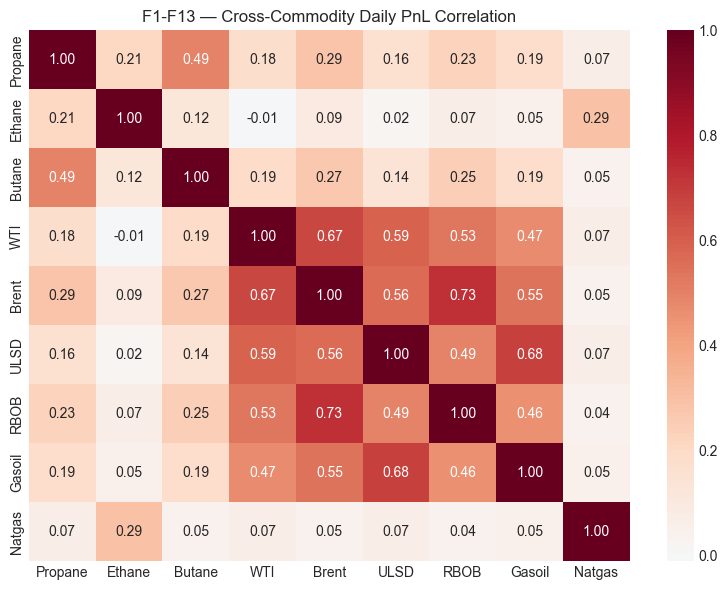

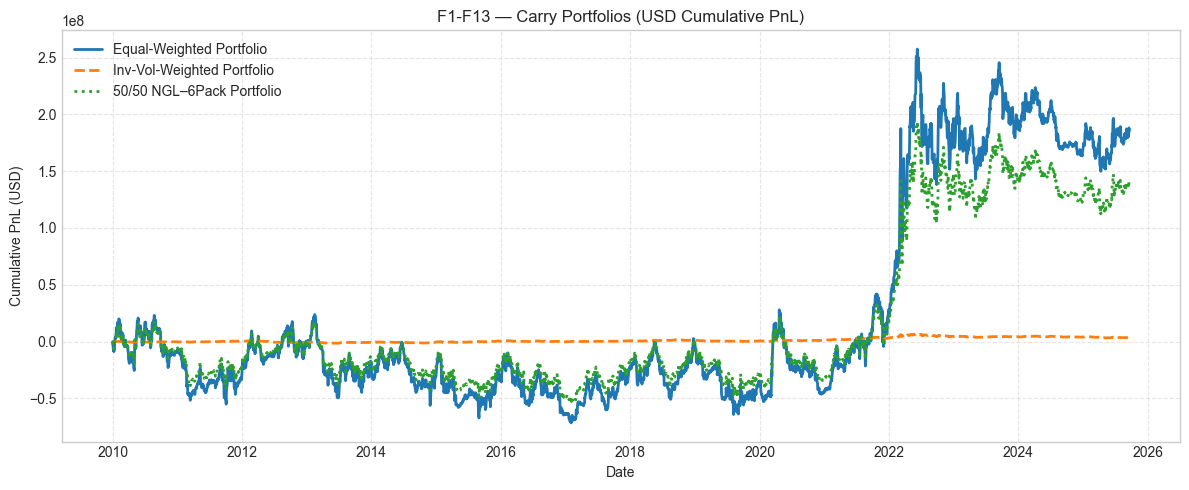

----- F1-F13 Portfolio Metrics (Equal) -----


Total PnL  Total Cost        APL/unit  Std Dev (ann.)  Sharpe  \
0 185,572,725.3333      0.0000 11,804,469.2831 60,786,814.5760  0.1942   

   Drawdown            RoD   Years  
0   -4.0045 2,947,825.2428 15.7205

----- F1-F13 Portfolio Metrics (InvVol) -----


Total PnL  Total Cost     APL/unit  Std Dev (ann.)  Sharpe  Drawdown  \
0 3,557,987.3515      0.0000 226,327.1843    996,425.8512  0.2271   -3.5510   

          RoD   Years  
0 63,736.9277 15.7205

----- F1-F13 Portfolio Metrics (Split50_50) -----


Total PnL  Total Cost       APL/unit  Std Dev (ann.)  Sharpe  \
0 139,178,963.0000      0.0000 8,853,315.0044 45,635,925.6023  0.1940   

   Drawdown            RoD   Years  
0   -4.0867 2,166,374.9587 15.7205

=== CARRY PORTFOLIO — F2-F14 ===


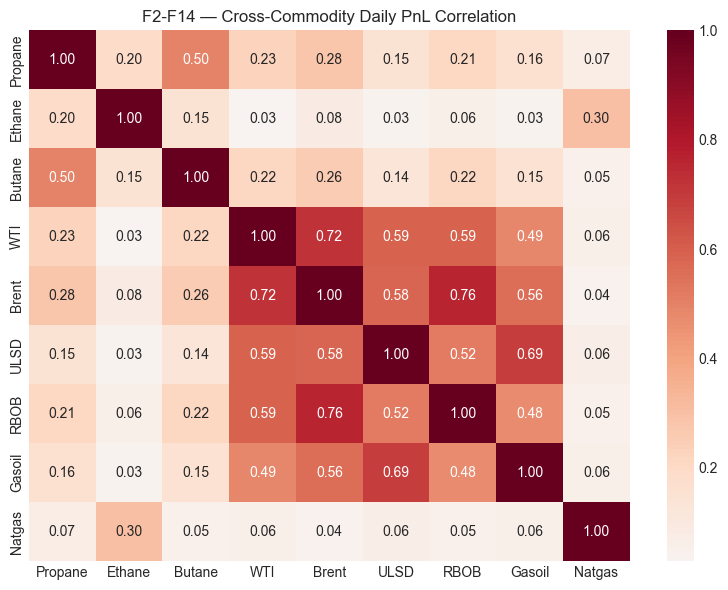

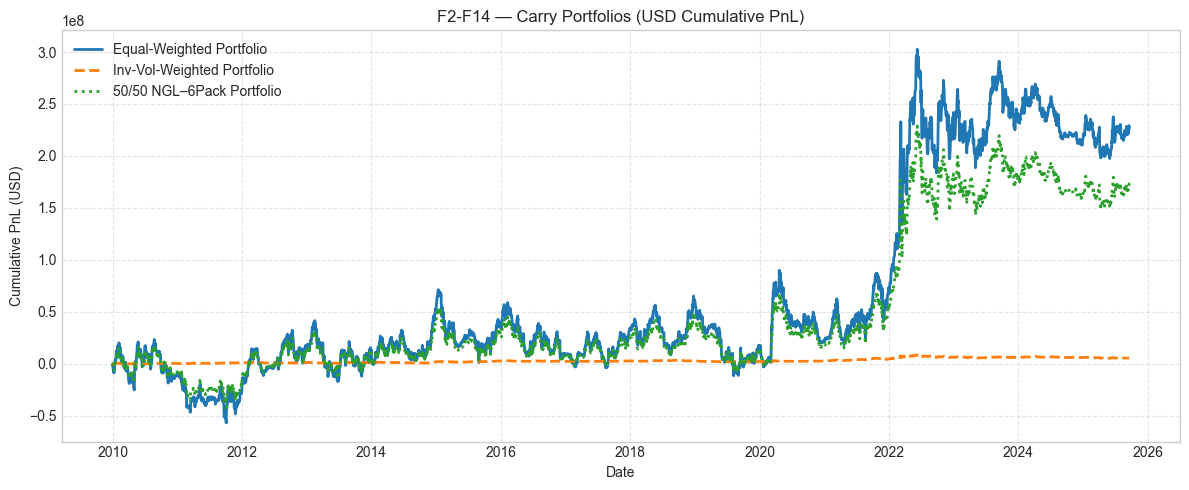

----- F2-F14 Portfolio Metrics (Equal) -----


Total PnL  Total Cost        APL/unit  Std Dev (ann.)  Sharpe  \
0 226,762,913.5556      0.0000 14,424,618.9348 61,318,263.3355  0.2352   

   Drawdown            RoD   Years  
0   -3.4373 4,196,526.0497 15.7205

----- F2-F14 Portfolio Metrics (InvVol) -----


Total PnL  Total Cost     APL/unit  Std Dev (ann.)  Sharpe  Drawdown  \
0 5,534,423.2369      0.0000 352,050.2756  1,006,114.0709  0.3499   -1.8477   

           RoD   Years  
0 190,531.0870 15.7205

----- F2-F14 Portfolio Metrics (Split50_50) -----


Total PnL  Total Cost        APL/unit  Std Dev (ann.)  Sharpe  \
0 171,218,578.6667      0.0000 10,891,387.4544 46,030,613.1841  0.2366   

   Drawdown            RoD   Years  
0   -3.4273 3,177,857.7825 15.7205

=== CARRY PORTFOLIO — F3-F15 ===


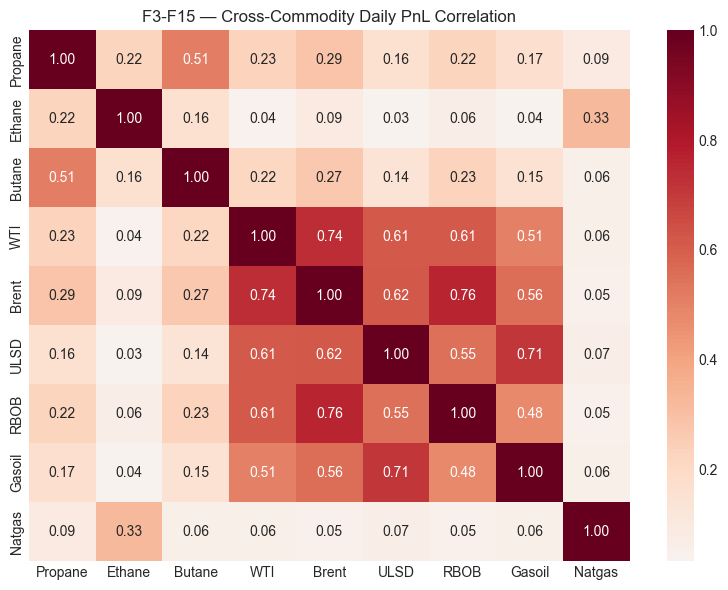

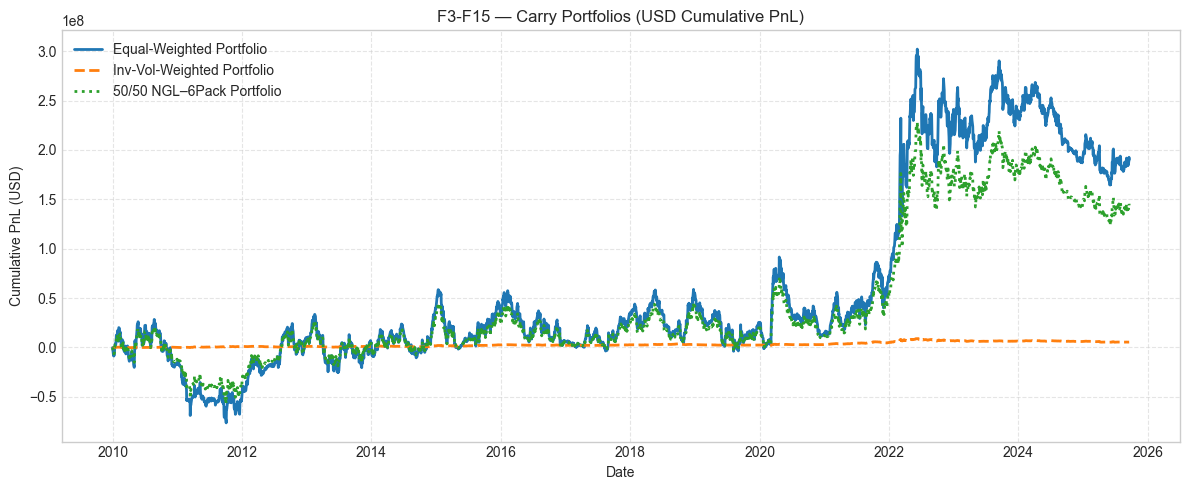

----- F3-F15 Portfolio Metrics (Equal) -----


Total PnL  Total Cost        APL/unit  Std Dev (ann.)  Sharpe  \
0 190,063,768.4444      0.0000 12,090,149.0907 61,926,080.7772  0.1952   

   Drawdown            RoD   Years  
0   -3.6876 3,278,599.9247 15.7205

----- F3-F15 Portfolio Metrics (InvVol) -----


Total PnL  Total Cost     APL/unit  Std Dev (ann.)  Sharpe  Drawdown  \
0 5,469,888.3449      0.0000 347,945.1457  1,019,565.2068  0.3413   -1.8456   

           RoD   Years  
0 188,530.6825 15.7205

----- F3-F15 Portfolio Metrics (Split50_50) -----


Total PnL  Total Cost       APL/unit  Std Dev (ann.)  Sharpe  \
0 143,875,194.3333      0.0000 9,152,047.0428 46,489,019.7454  0.1969   

   Drawdown            RoD   Years  
0   -3.6827 2,485,145.6534 15.7205

=== CARRY PORTFOLIO — F4-F16 ===


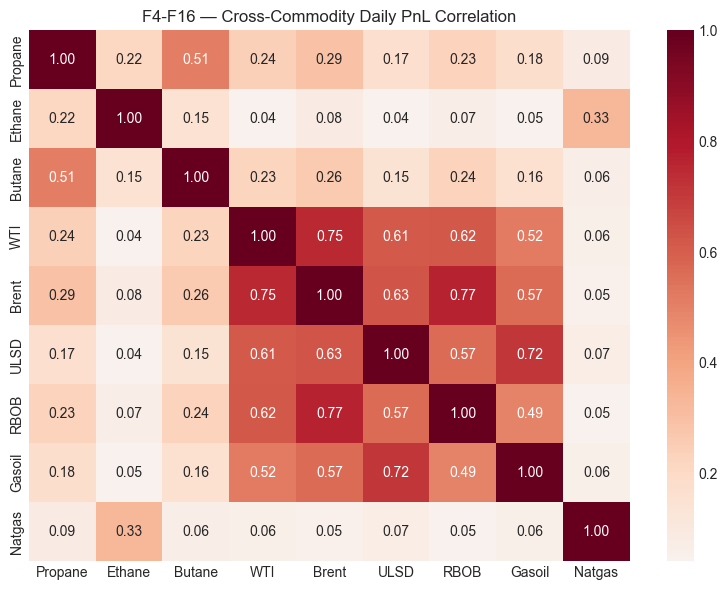

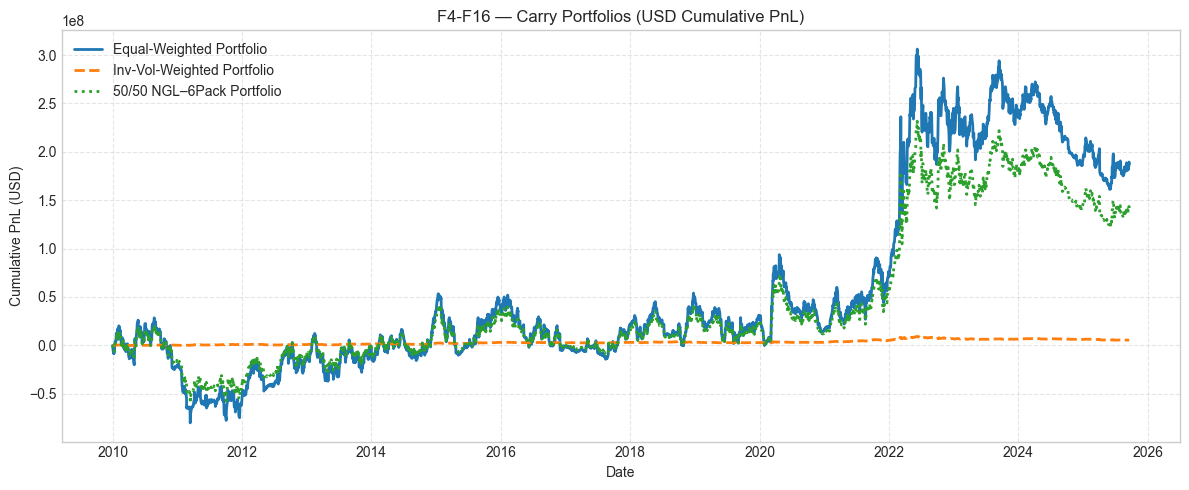

----- F4-F16 Portfolio Metrics (Equal) -----


Total PnL  Total Cost        APL/unit  Std Dev (ann.)  Sharpe  \
0 186,983,274.2222      0.0000 11,894,195.7287 62,222,929.6499  0.1912   

   Drawdown            RoD   Years  
0   -3.8189 3,114,568.6341 15.7205

----- F4-F16 Portfolio Metrics (InvVol) -----


Total PnL  Total Cost     APL/unit  Std Dev (ann.)  Sharpe  Drawdown  \
0 5,447,640.2196      0.0000 346,529.9199  1,025,638.9964  0.3379   -1.5482   

           RoD   Years  
0 223,827.2399 15.7205

----- F4-F16 Portfolio Metrics (Split50_50) -----


Total PnL  Total Cost       APL/unit  Std Dev (ann.)  Sharpe  \
0 141,650,244.6667      0.0000 9,010,515.7378 46,713,561.5884  0.1929   

   Drawdown            RoD   Years  
0   -3.8196 2,359,017.1713 15.7205

=== CARRY PORTFOLIO — F5-F17 ===


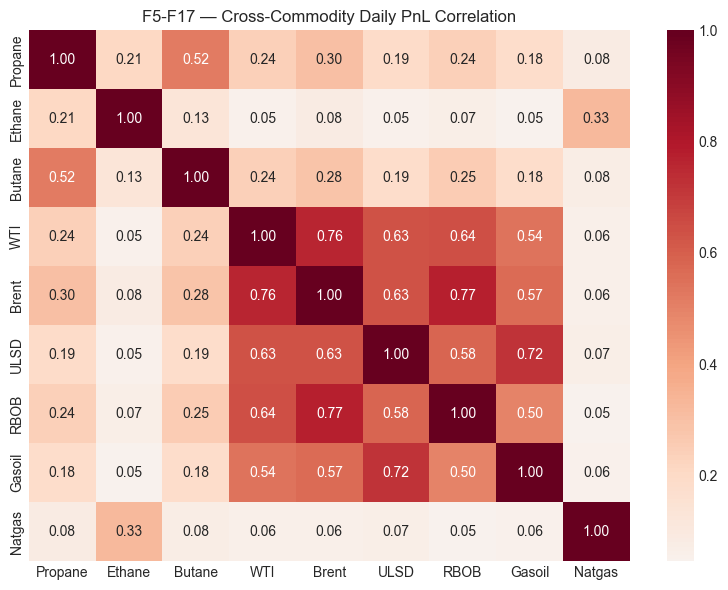

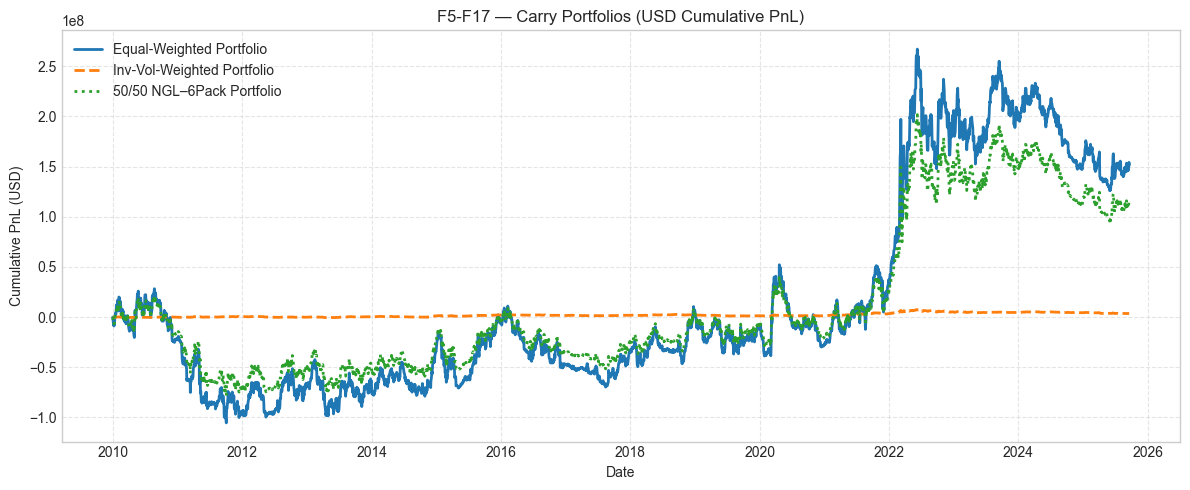

----- F5-F17 Portfolio Metrics (Equal) -----


Total PnL  Total Cost       APL/unit  Std Dev (ann.)  Sharpe  \
0 151,630,363.7778      0.0000 9,645,361.2372 62,599,867.7279  0.1541   

   Drawdown            RoD   Years  
0   -4.7277 2,040,171.8644 15.7205

----- F5-F17 Portfolio Metrics (InvVol) -----


Total PnL  Total Cost     APL/unit  Std Dev (ann.)  Sharpe  Drawdown  \
0 3,626,104.8629      0.0000 230,660.2083  1,033,311.1970  0.2232   -3.5425   

          RoD   Years  
0 65,112.2545 15.7205

----- F5-F17 Portfolio Metrics (Split50_50) -----


Total PnL  Total Cost       APL/unit  Std Dev (ann.)  Sharpe  \
0 114,615,962.3333      0.0000 7,290,837.6179 47,000,829.6534  0.1551   

   Drawdown            RoD   Years  
0   -4.7520 1,534,271.5242 15.7205

In [ ]:
# ---------------------------------------------------------------------
# PORTFOLIO AGGREGATION — TRUE PNL + INV-VOL + SPLIT BASKET
# ---------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define NGL and 6-pack tickers
NGLS = ["Propane", "Ethane", "Butane"]
SIXPACK = ["WTI", "Brent", "ULSD", "RBOB", "Gasoil", "Natgas"]

# ---------------------------------------------------------------------
# 1) MOMENTUM (MA) PORTFOLIOS
# ---------------------------------------------------------------------
ma_portfolios = {}
ma_corrs = {}

for strat_name in ["MA1/20", "MA1/60", "MA1/120", "MA1/250", "MA20/250"]:
    print("=" * 100)
    print(f"=== MOMENTUM PORTFOLIO — {strat_name} ===")

    # --- Collect daily net_pnl_dollar across all commodities ---
    dfs = []
    for comm, results in all_ma_results.items():
        if strat_name in results:
            df = results[strat_name][["net_pnl_dollar"]].rename(columns={"net_pnl_dollar": comm})
            dfs.append(df)

    if not dfs:
        print(f"No data for {strat_name}, skipping.")
        continue

    pnl_df = pd.concat(dfs, axis=1).sort_index().dropna(how="any")
    if pnl_df.empty:
        print(f"No overlapping data for {strat_name}, skipping.")
        continue

    # --- Correlation matrix ---
    corr = pnl_df.corr()
    ma_corrs[strat_name] = corr

    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdBu_r", center=0)
    plt.title(f"{strat_name} — Cross-Commodity Daily PnL Correlation")
    plt.tight_layout()
    plt.show()

    # --- Compute portfolio weights ---
    vol = pnl_df.std()
    inv_vol = 1 / vol.replace(0, np.nan)
    inv_vol_weights = inv_vol / inv_vol.sum()
    eq_weights = pd.Series(1 / len(vol), index=vol.index)

    # --- Split-basket weights (50% NGLs, 50% 6-pack) ---
    w_split = pd.Series(0.0, index=pnl_df.columns)
    ngl_mask = w_split.index.isin(NGLS)
    pack_mask = w_split.index.isin(SIXPACK)
    if ngl_mask.sum() > 0:
        w_split[ngl_mask] = 0.5 / ngl_mask.sum()
    if pack_mask.sum() > 0:
        w_split[pack_mask] = 0.5 / pack_mask.sum()

    # --- Portfolio PnL series ---
    port_eq_pnl = (pnl_df * eq_weights).sum(axis=1)
    port_iv_pnl = (pnl_df * inv_vol_weights).sum(axis=1)
    port_split_pnl = (pnl_df * w_split).sum(axis=1)


    # --- Cumulative portfolios ---
    eq_eq = port_eq_pnl.cumsum()
    iv_eq = port_iv_pnl.cumsum()
    split_eq = port_split_pnl.cumsum()
    ma_portfolios[strat_name] = {
        "equal": eq_eq,
        "invvol": iv_eq,
        "split": split_eq
    }

    # --- Plot cumulative PnL ---
    plt.figure(figsize=(12, 5))
    plt.plot(eq_eq.index, eq_eq, label="Equal-Weighted Portfolio", linewidth=2)
    plt.plot(iv_eq.index, iv_eq, label="Inv-Vol-Weighted Portfolio", linewidth=2, linestyle="--")
    plt.plot(split_eq.index, split_eq, label="50/50 NGL–6Pack Portfolio", linewidth=2, linestyle=":")
    plt.title(f"{strat_name} — Momentum Portfolios (USD Cumulative PnL)")
    plt.xlabel("Date"); plt.ylabel("Cumulative PnL (USD)")
    plt.legend(); plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout(); plt.show()

    # --- Portfolio metrics ---
    for label, pnl in {
        "Equal": port_eq_pnl, 
        "InvVol": port_iv_pnl, 
        "Split50_50": port_split_pnl
    }.items():
        df_port = pd.DataFrame({
            "net_pnl": pnl,
            "t_cost": np.zeros(len(pnl))
        })
        port_metrics = metrics(df_port, contracts=1, units=1)
        print(f"----- {strat_name} Portfolio Metrics ({label}) -----")
        display(port_metrics.to_frame().T)


# ---------------------------------------------------------------------
# 2) CARRY PORTFOLIOS
# ---------------------------------------------------------------------
carry_portfolios = {}
carry_corrs = {}

for strat_name in ["F1-F13", "F2-F14", "F3-F15", "F4-F16", "F5-F17"]:
    print("=" * 100)
    print(f"=== CARRY PORTFOLIO — {strat_name} ===")

    # --- Collect daily net_pnl_dollar across all commodities ---
    dfs = []
    for comm, results in all_carry_results.items():
        if strat_name in results:
            df = results[strat_name][["net_pnl_dollar"]].rename(columns={"net_pnl_dollar": comm})
            dfs.append(df)

    if not dfs:
        print(f"No data for {strat_name}, skipping.")
        continue

    pnl_df = pd.concat(dfs, axis=1).sort_index().dropna(how="any")
    if pnl_df.empty:
        print(f"No overlapping data for {strat_name}, skipping.")
        continue

    # --- Correlation matrix ---
    corr = pnl_df.corr()
    carry_corrs[strat_name] = corr

    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdBu_r", center=0)
    plt.title(f"{strat_name} — Cross-Commodity Daily PnL Correlation")
    plt.tight_layout(); plt.show()

    # --- Compute portfolio weights ---
    vol = pnl_df.std()
    inv_vol = 1 / vol.replace(0, np.nan)
    inv_vol_weights = inv_vol / inv_vol.sum()
    eq_weights = pd.Series(1 / len(vol), index=vol.index)

    # --- Split-basket weights (50% NGLs, 50% 6-pack) ---
    w_split = pd.Series(0.0, index=pnl_df.columns)
    ngl_mask = w_split.index.isin(NGLS)
    pack_mask = w_split.index.isin(SIXPACK)
    if ngl_mask.sum() > 0:
        w_split[ngl_mask] = 0.5 / ngl_mask.sum()
    if pack_mask.sum() > 0:
        w_split[pack_mask] = 0.5 / pack_mask.sum()

    # --- Portfolio PnL series ---
    port_eq_pnl = (pnl_df * eq_weights).sum(axis=1)
    port_iv_pnl = (pnl_df * inv_vol_weights).sum(axis=1)
    port_split_pnl = (pnl_df * w_split).sum(axis=1)

    # --- Cumulative portfolios ---
    eq_eq = port_eq_pnl.cumsum()
    iv_eq = port_iv_pnl.cumsum()
    split_eq = port_split_pnl.cumsum()
    carry_portfolios[strat_name] = {
        "equal": eq_eq,
        "invvol": iv_eq,
        "split": split_eq
    }

    # --- Plot cumulative PnL ---
    plt.figure(figsize=(12, 5))
    plt.plot(eq_eq.index, eq_eq, label="Equal-Weighted Portfolio", linewidth=2)
    plt.plot(iv_eq.index, iv_eq, label="Inv-Vol-Weighted Portfolio", linewidth=2, linestyle="--")
    plt.plot(split_eq.index, split_eq, label="50/50 NGL–6Pack Portfolio", linewidth=2, linestyle=":")
    plt.title(f"{strat_name} — Carry Portfolios (USD Cumulative PnL)")
    plt.xlabel("Date"); plt.ylabel("Cumulative PnL (USD)")
    plt.legend(); plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout(); plt.show()

    # --- Portfolio metrics ---
    for label, pnl in {
        "Equal": port_eq_pnl, 
        "InvVol": port_iv_pnl, 
        "Split50_50": port_split_pnl
    }.items():
        df_port = pd.DataFrame({
            "net_pnl": pnl,
            "t_cost": np.zeros(len(pnl))
        })
        port_metrics = metrics(df_port, contracts=1, units=1)
        print(f"----- {strat_name} Portfolio Metrics ({label}) -----")
        display(port_metrics.to_frame().T)
